In [1]:
import numpy as np
from scipy.interpolate import interp2d, interp1d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from astropy import time
from astropy.io import fits
import pandas as pd
from scipy.interpolate import RegularGridInterpolator, interp1d
import sys
import re


%matplotlib notebook

In [2]:
import seaborn as sns

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})

sns.set(font='Arial',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":14,
                                "axes.labelsize":14})
sns.set_palette("colorblind", color_codes=True)


In [3]:
# import seaborn as sns

# sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})

# # For dark background plots 
# sns.set(font='Arial',
#         rc={
#  'axes.axisbelow': False,
#  'axes.edgecolor': 'lightgrey',
#  'axes.facecolor': 'black',
#  'axes.grid': False,
#  'axes.labelcolor': 'white',
#  'axes.spines.right': True,
#  'axes.spines.top': True,
#  'figure.facecolor': 'black',
#  'lines.solid_capstyle': 'round',
#  'patch.edgecolor': 'w',
#  'patch.force_edgecolor': True,
#  'text.color': 'white',
#  'xtick.bottom': True,
#  'xtick.color': 'white',
#  'xtick.direction': 'out',
#  'xtick.top': False,
#  'ytick.color': 'white',
#  'ytick.direction': 'out',
#  'ytick.left': True,
#  'ytick.right': False})
# sns.set_context("paper", rc={"font.size":17,
#                                 "axes.titlesize":16,
#                                 "axes.labelsize":16})
# sns.set_palette("colorblind", color_codes=True)


In [3]:
def merge_ev_files(sink, wd='./hd98800', ev_files=1):
    data = pd.DataFrame()
    for file_number in range(1, ev_files+1):
        data_subset = pd.read_csv(
        f'{wd}/discSink000{sink}N0{file_number}.ev', sep='\s+', skiprows=[0], engine='python', names=[str(i) for i in range(20)]
    )
        data = pd.concat([data, data_subset], ignore_index=True)
    
    return data

def fill_disc(inner_r, outer_r, ang, axis, colour='k', alpha=0.5):
    a, b = [inner_r, outer_r], [inner_r*np.cos(inc_disc)*(1-e_disc**2)**0.5, 
                                outer_r*np.cos(inc_disc)*(1-e_disc**2)**0.5]
    
    x = np.outer(a, np.cos(ang))
    y = np.outer(b, np.sin(ang))
    xs = x*np.cos(pos_disc) - y*np.sin(pos_disc)
    ys = x*np.sin(pos_disc) + y*np.cos(pos_disc)
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    axis.fill(np.ravel(xs), np.ravel(ys), color=colour, edgecolor=None, alpha=alpha)


# Script to plot the contents of a .pix file output
def read_header( file ):
    """
      read the x, y and v plot limits from the .pix header lines
    """
    pat = re.compile(r'.*min\s*=\s+(\S+)\s+max\s*=\s+(\S+)')
    fh = open(file, 'r')
    count = 0
    got = 0
    xmin = np.full((3),0.)
    xmax = np.full((3),1.)
    while (count < 10):
       count += 1

       # Get next line from file
       line = fh.readline()

       # if line is empty
       # end of file is reached
       if not line:
          break

       # otherwise match lines like "min = 0.000 max = 1.000"
       if (pat.match(line)):
          [m] = pat.findall(line)
          xmin[got] = m[0]
          xmax[got] = m[1]
          got += 1
    return xmin[2],xmax[2],xmin[1],xmax[1],xmin[0],xmax[0]

def read_pix( file ):
    """
      read the floating point pixel values
    """
    array = np.loadtxt(file)
    return array

def plot_pix( file, newfig=False):
    """
      plot the pixel map with appropriate limits
    """
    ymin,ymax,xmin,xmax,vmin,vmax = read_header(file)
    img = read_pix(file)
    print(file,img.shape)
    if newfig:
        plt.figure()
    plt.imshow(img,cmap='RdBu',origin='lower',vmin=vmin,vmax=vmax,extent=[xmin,xmax,ymin,ymax])
    plt.show()


In [4]:
# Ab
data1 = merge_ev_files(1)
x1 = np.array(data1['1'])
y1 = np.array(data1['2'])
vx1 = np.array(data1['5'])
vy1 = np.array(data1['6'])

# Bb
data2 = merge_ev_files(2)
x2 = np.array(data2['1'])
y2 = np.array(data2['2'])
vx2 = np.array(data2['5'])
vy2 = np.array(data2['6'])

# Aa
data3 = merge_ev_files(3)
x3 = np.array(data3['1'])
y3 = np.array(data3['2'])
vx3 = np.array(data3['5'])
vy3 = np.array(data3['6'])

# Ba
data4 = merge_ev_files(4)
x4 = np.array(data4['1'])
y4 = np.array(data4['2'])
vx4 = np.array(data4['5'])
vy4 = np.array(data4['6'])

<IPython.core.display.Javascript object>


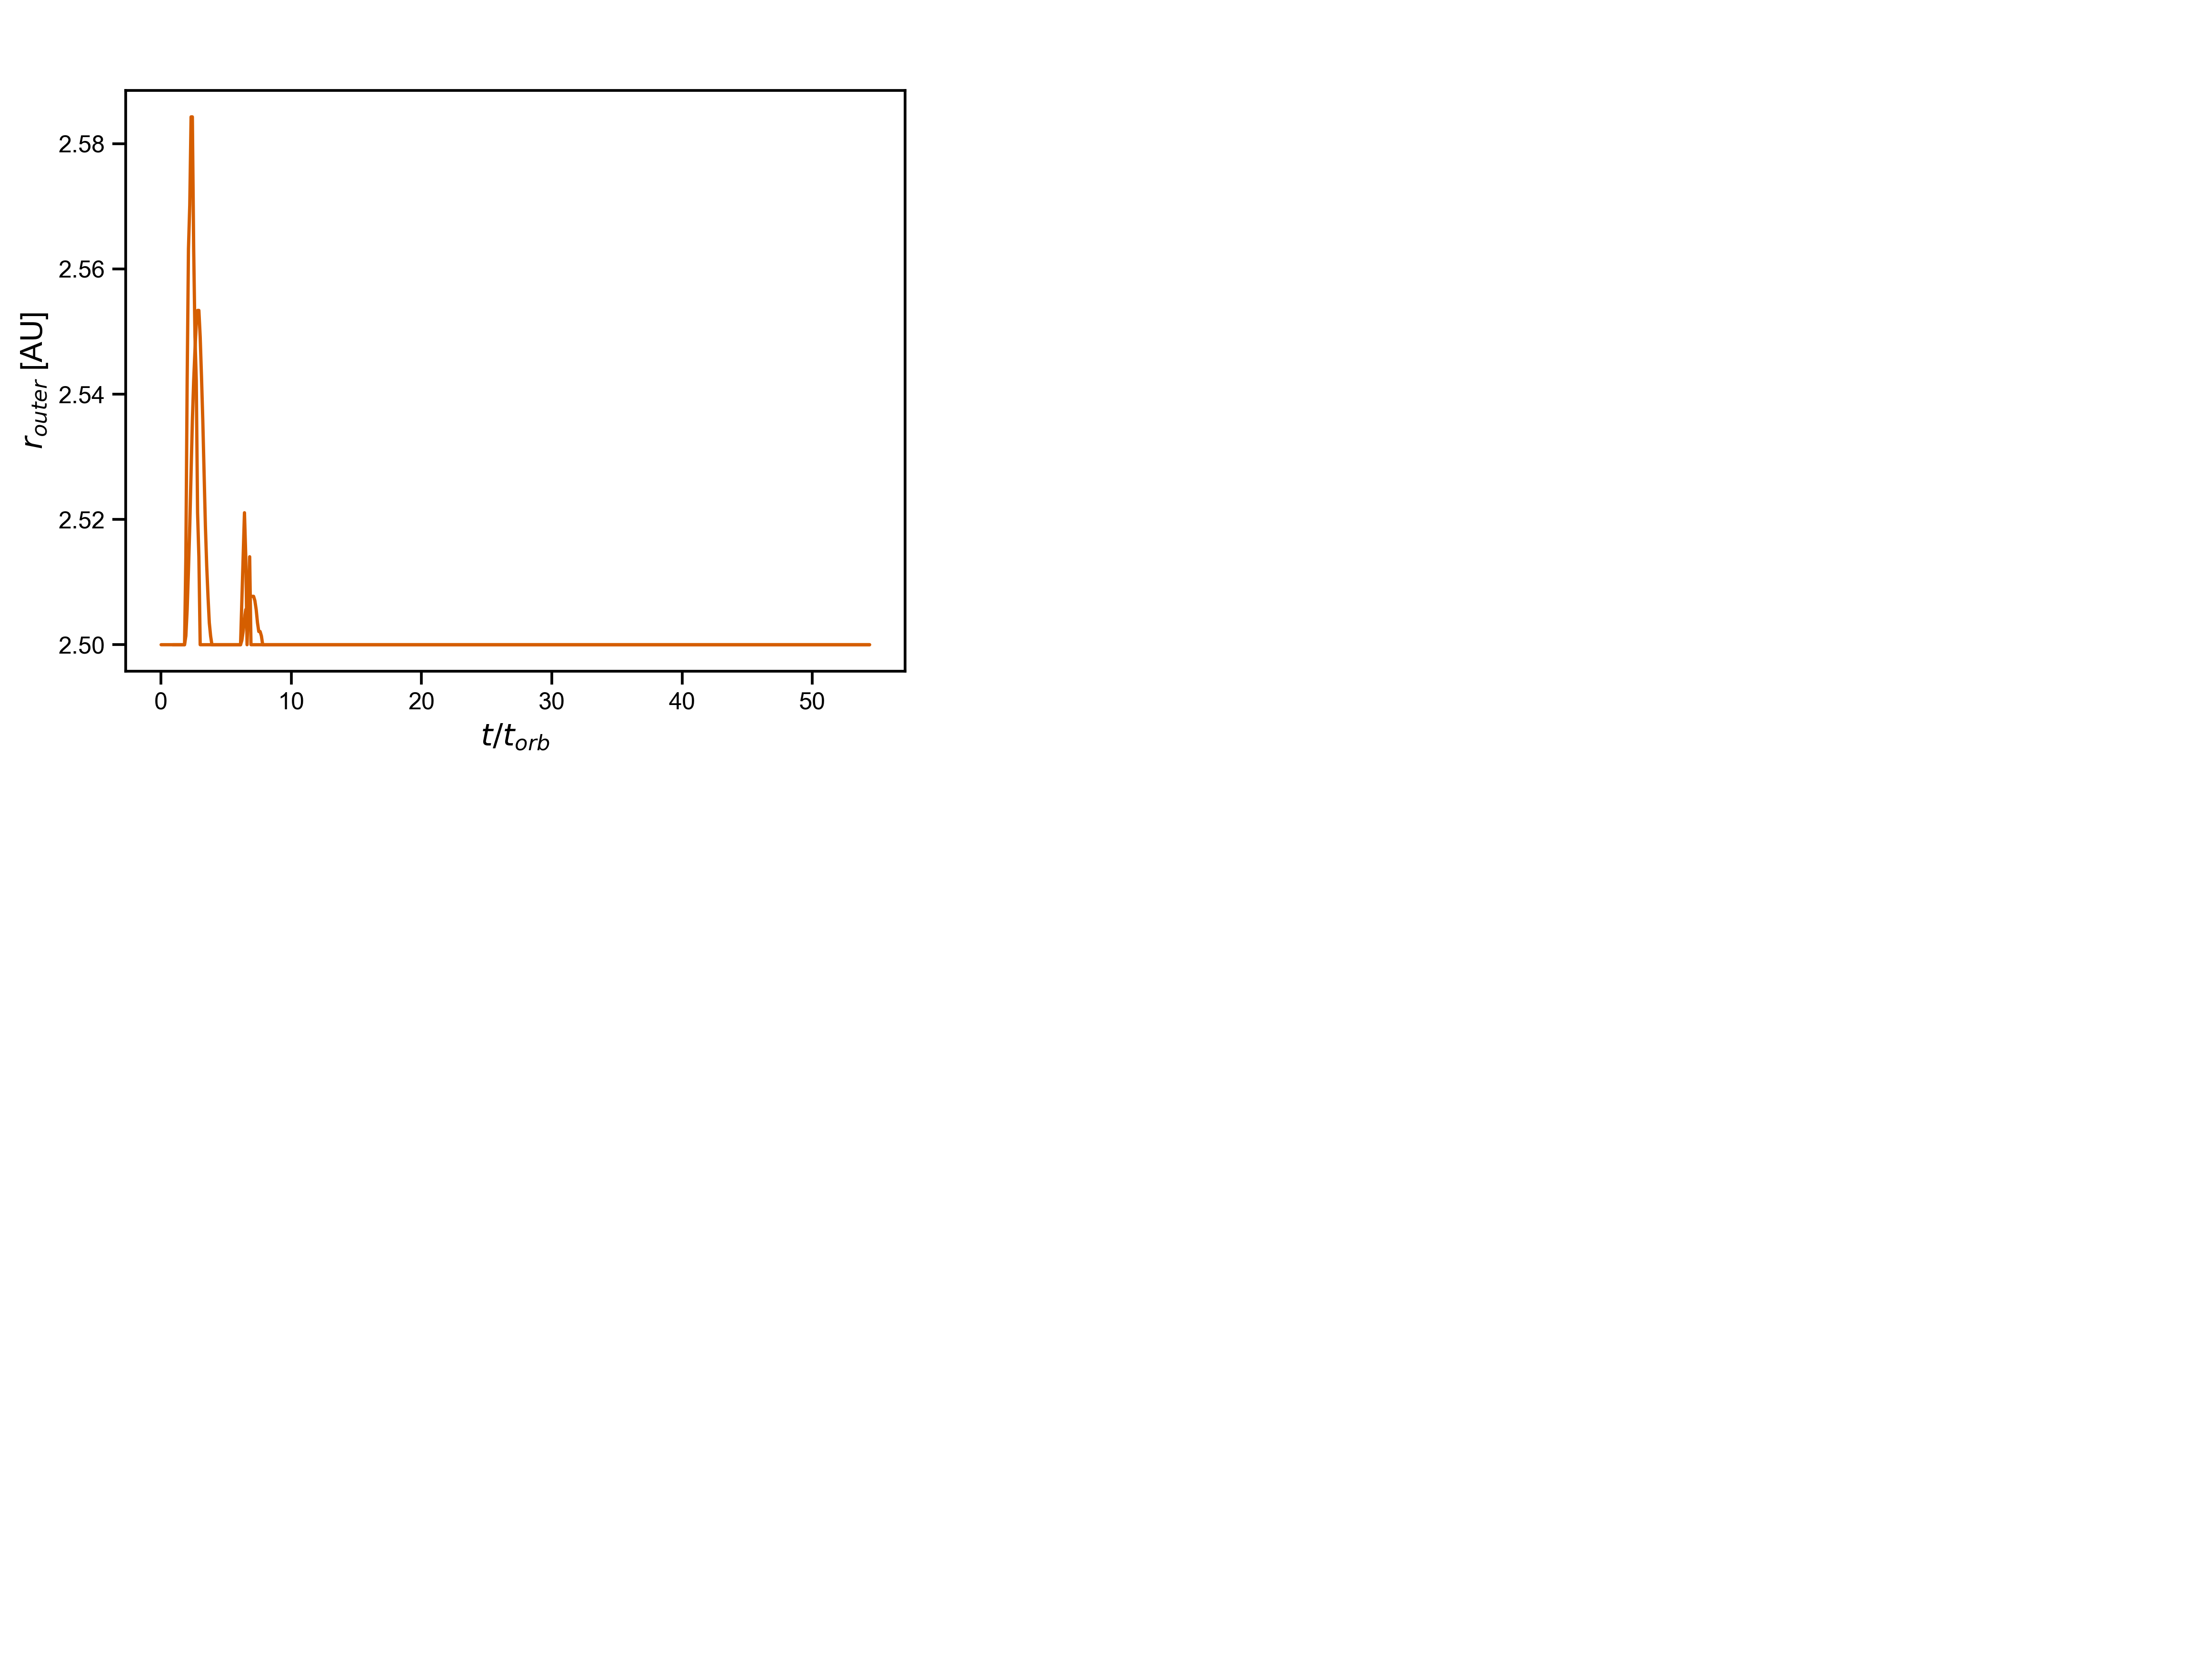

In [9]:
# # Plotting disc  transients over time

# home_dir = "/storage/astro2/phrkvg/"
# wd = "disc_2_stars_copy/"
# frac = 0.25
# angm_files = range(0,545,1)

# r_inners = []
# r_outers = []
# times = []
# sigma_inners = []

# columns = ['radius', 'sigma', '<h>/H', 'lx', 'ly', 'lz', 'tilt', 'twist', 'psi', 'H/R', '|e|']

# for angm_file in angm_files:
#     file_no = str(angm_file).rjust(5, '0')
#     file = home_dir+wd+"angm" + file_no
#     time = float(open(file).readline().split()[-1])/(2*np.pi*0.862)    # [Number of B binary orbits]
#     data = pd.read_csv(file, sep='\s+', skiprows=[0,1], engine='python', names=[columns[i] for i in range(11)]) 
#     sigma_frac = frac*np.nanmax(data['sigma'])
#     max_i = np.nanargmax(data['sigma'])
#     inner_edge =  np.nanargmin(data['sigma'][:max_i])
#     outer_edge =  np.nanargmin(data['sigma'][max_i:])
#     for i in range(max_i):
#         if data['sigma'][i] < sigma_frac:
#             continue
#         else:
#             inner_edge = i
#             break
#     for i in range(max_i,len(data)):
#         if data['sigma'][i] > sigma_frac:
#             continue
#         else:
#             outer_edge = i
#             break



#     r_inner = data['radius'][inner_edge]
#     sigma_inner = data['sigma'][inner_edge]
#     r_outer = data['radius'][outer_edge]
#     sigma_outer = data['sigma'][outer_edge] 


#     r_inners.append(r_inner)
#     r_outers.append(r_outer)
#     times.append(time)    # convert time units to number of B orbits
#     sigma_inners.append(sigma_inner)



# fig_rinner = plt.figure()
# plt.xlabel('$t/t_{orb}$')
# plt.ylabel('$r_{outer}$ [AU]')
# radii_binned = pd.DataFrame(r_inners).rolling(10).mean()[0].tolist()
# plt.plot(times, radii_binned, 'r')
# plt.plot(times, r_inners, 'r', label='Full data')



<IPython.core.display.Javascript object>


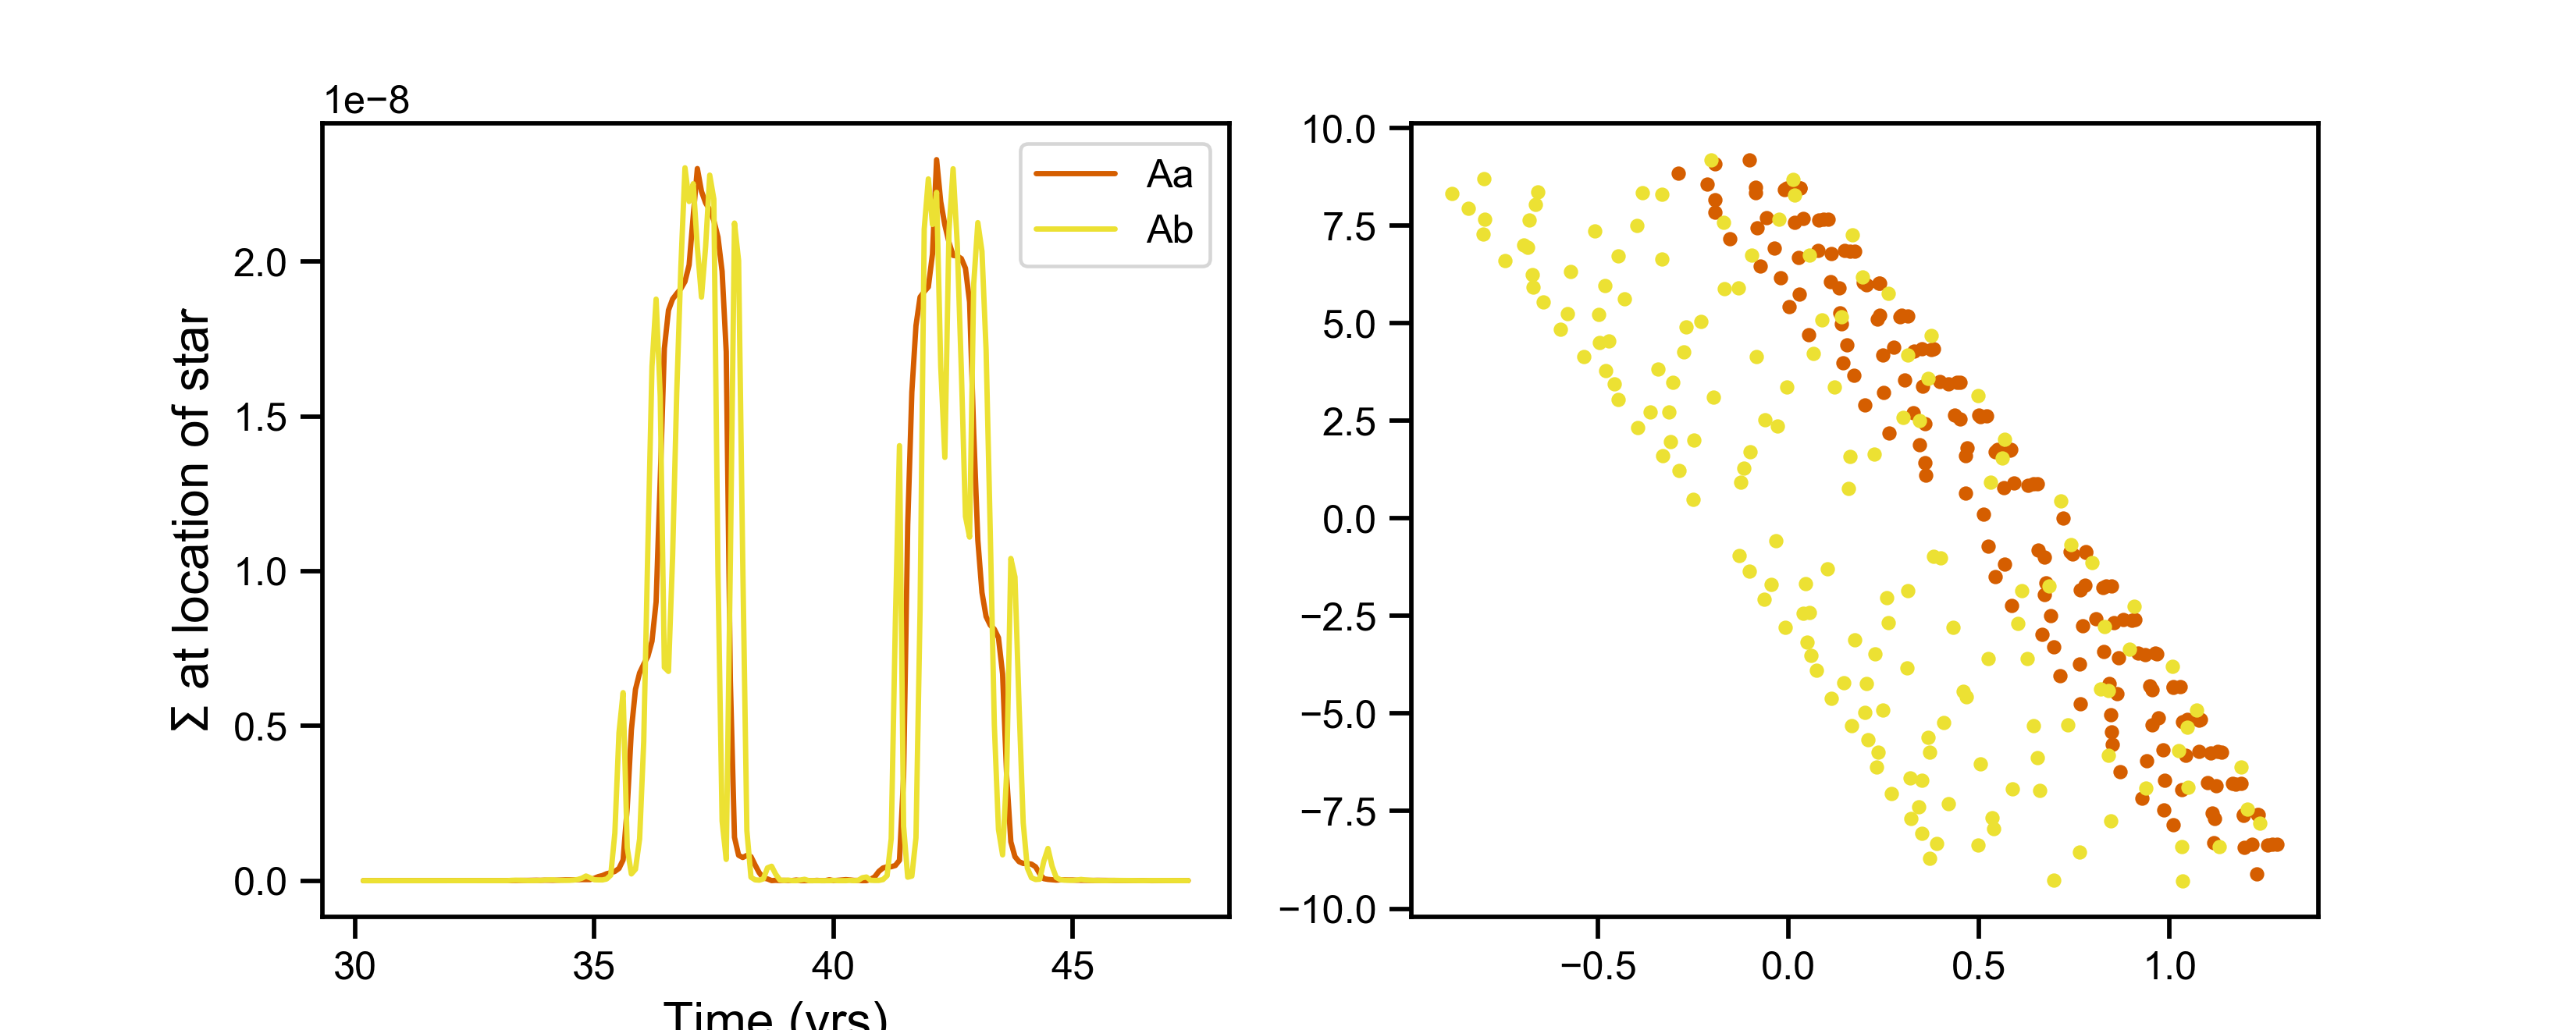

NameError: name 'fill_disc' is not defined

In [10]:
# # Plot sigma at star's locations over time

# home_dir = "/storage/astro2/phrkvg/"
# wd = "hd98800/"
# angm_files = range(350,551,1)
# sigma_limit = 0
# angles = np.linspace(0, 2*np.pi, 100)


# sigma_Aa = []
# sigma_Ab = []
# times = []
# x_Aa_transit = []
# x_Ab_transit = []
# y_Aa_transit = []
# y_Ab_transit = []

# columns = ['radius', 'sigma', '<h>/H', 'lx', 'ly', 'lz', 'tilt', 'twist', 'psi', 'H/R', '|e|']

# fig_transit, ax = plt.subplots(1, 2, figsize=(10,4))

# r_inners_min = min(r_inners[400:])
# r_outers_max = max(r_outers[400:])

# for angm_file in angm_files:
#     file_no = str(angm_file).rjust(5, '0')
#     file = home_dir+wd+"angm" + file_no
#     code_time = float(open(file).readline().split()[-1])
#     time = code_time/(2*np.pi)    # [years]
#     times.append(time)
#     angm_data = pd.read_csv(file, sep='\s+', skiprows=[0,1], engine='python', names=[columns[i] for i in range(11)]) 
#     radii = np.array(angm_data['radius'])
#     sigma = angm_data['sigma'].tolist()
    
#     x_Aa = data3.loc[data3['0'] == code_time]['1']
#     y_Aa = data3.loc[data3['0'] == code_time]['2']
#     x_Ab = data1.loc[data1['0'] == code_time]['1']
#     y_Ab = data1.loc[data1['0'] == code_time]['2']
#     r_Aa = float((x_Aa**2 + y_Aa**2)**0.5)
#     r_Ab = float((x_Ab**2 + y_Ab**2)**0.5)

# #     i_Aa = np.nanargmin(abs(radii - r_Aa))
# #     closest_r_Aa = radii[i_Aa]
# #     i_Ab = np.nanargmin(abs(radii - r_Ab))
# #     closest_r_Ab = radii[i_Ab]

#     interp = interp1d(radii, sigma)
#     if min(radii) < r_Aa < max(radii):
#         sigma_at_Aa = interp(r_Aa)
#     else:
#         sigma_at_Aa = 0
#     if min(radii) < r_Ab < max(radii):
#         sigma_at_Ab = interp(r_Ab)
#     else:
#         sigma_at_Ab = 0

#     if sigma_at_Aa > sigma_limit:
#         x_Aa_transit.append(x_Aa)
#         y_Aa_transit.append(y_Aa)
#         sigma_Aa.append(sigma_at_Aa)
#     else:
#         sigma_Aa.append(0)

#     if sigma_at_Ab > sigma_limit:
#         x_Ab_transit.append(x_Ab)
#         y_Ab_transit.append(y_Ab)
#         sigma_Ab.append(sigma_at_Ab)
#     else:
#         sigma_Ab.append(0)


# ax[0].plot(times, sigma_Aa, 'r', label='Aa', figure=fig_transit)
# ax[0].plot(times, sigma_Ab, 'y', label='Ab', figure=fig_transit)
# ax[0].set_xlabel('Time (yrs)')
# ax[0].set_ylabel('$\Sigma$ at location of star')
# ax[0].legend()


# ax[1].plot(x_Aa_transit, y_Aa_transit, 'r.', label='Aa', figure=fig_transit)
# ax[1].plot(x_Ab_transit, y_Ab_transit, 'y.', label='Ab', figure=fig_transit)
# fill_disc(r_inners_min, r_outers_max, angles, ax[1], alpha=0.1)
# ax[1].set_xlabel('x [AU]')
# ax[1].set_ylabel('y [AU]')
# ax[1].legend()

    

<IPython.core.display.Javascript object>


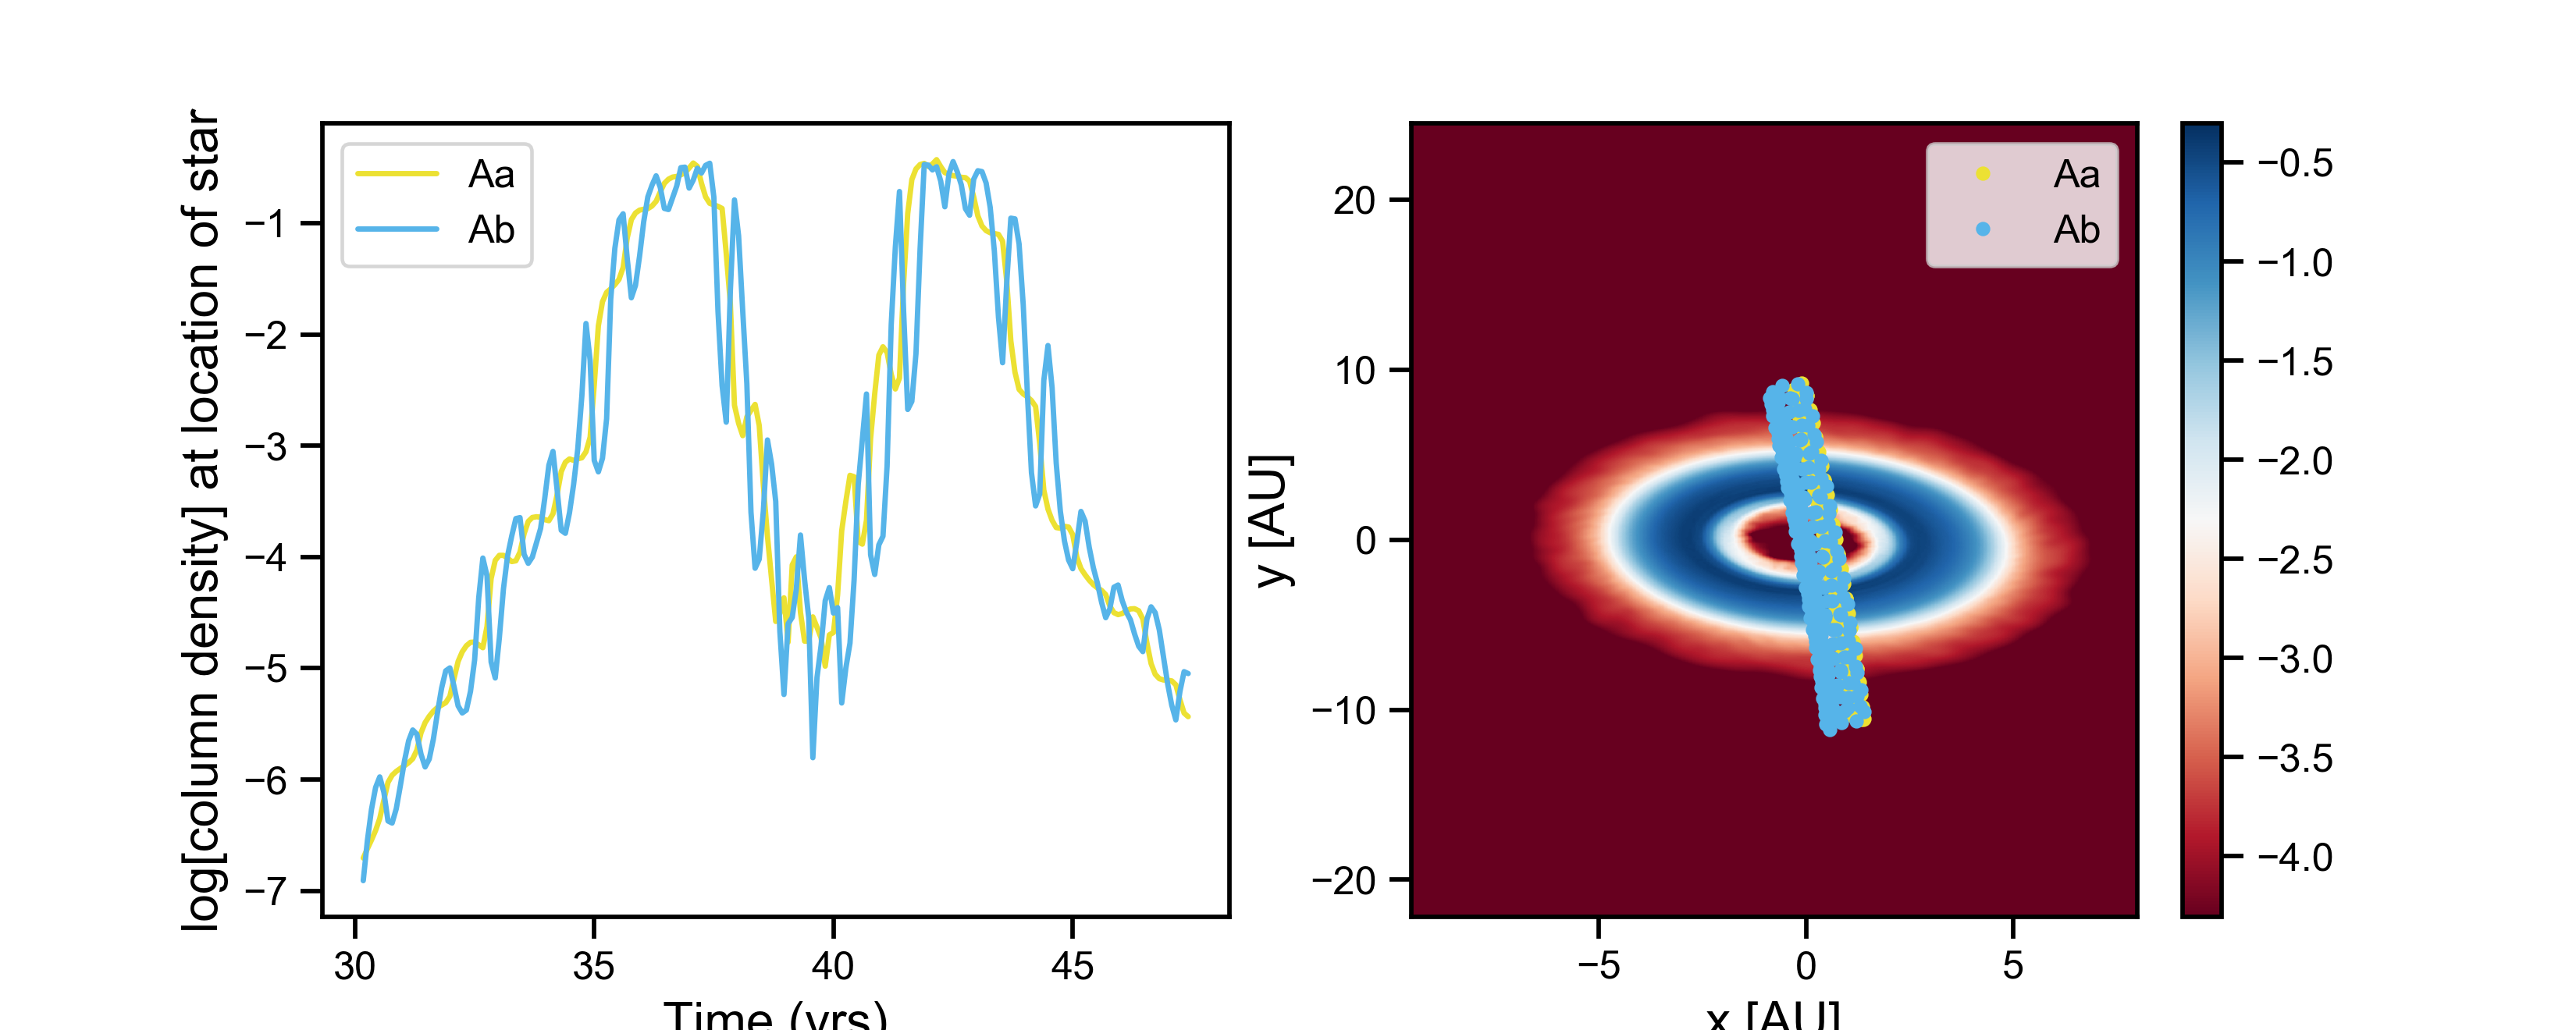

/storage/astro2/phrkvg/hd98800/newdump_00500_logcolumndensitygcm2_proj.pix (550, 207)


In [14]:
# # Plot log column density at star's locations over time


# home_dir = "/storage/astro2/phrkvg/"
# wd = "hd98800/"
# files = range(350,551,1)
# lcd_limit = -666

# lcd_Aa = []
# lcd_Ab = []
# times = []
# x_Aa_transit = []
# x_Ab_transit = []
# y_Aa_transit = []
# y_Ab_transit = []


# fig_transit, ax = plt.subplots(1, 2, figsize=(10,4))


# for file in files:
#     file_no = str(file).rjust(5, '0')
#     pix_file = home_dir + wd + "newdump_" + file_no + "_logcolumndensitygcm2_proj.pix"
#     code_time = float(open(home_dir+wd+"angm" + file_no).readline().split()[-1])
#     time = code_time/(2*np.pi)
#     times.append(time)

#     xmin, xmax = open(pix_file).readlines()[6].split()[-4::3]
#     xrange = float(xmax) - float(xmin)
#     ymin, ymax = open(pix_file).readlines()[7].split()[-4::3]
#     yrange = float(ymax) - float(ymin)
#     pix_data = np.array(pd.read_csv(pix_file, sep='\s+', skiprows=10, engine='python'))
#     dx = xrange/pix_data.shape[1]
#     dy = yrange/pix_data.shape[0]
    
#     x_Aa = float(data3.loc[data3['0'] == code_time]['1'])
#     y_Aa = float(data3.loc[data3['0'] == code_time]['2'])
#     x_Ab = float(data1.loc[data1['0'] == code_time]['1'])
#     y_Ab = float(data1.loc[data1['0'] == code_time]['2'])
    
#     xi_Aa = (x_Aa - float(xmin))/dx
#     yi_Aa = (y_Aa - float(ymin))/dy
#     xi_Ab = (x_Ab - float(xmin))/dx
#     yi_Ab = (y_Ab - float(ymin))/dy
# #     print(xi_Aa, yi_Aa)
# #     print(xi_Ab, yi_Ab)
    
#     xcoords = np.arange(pix_data.shape[1])
#     ycoords = np.arange(pix_data.shape[0])
#     lin_interp = interp2d(xcoords, ycoords, pix_data)
#     z_Aa = lin_interp(xi_Aa, yi_Aa)
#     z_Ab = lin_interp(xi_Ab, yi_Ab)
        
#     if lcd_limit < z_Aa:
# #         print('Aa: ', pix_data[yi_Aa, xi_Aa])
#         x_Aa_transit.append(x_Aa)
#         y_Aa_transit.append(y_Aa)
#         lcd_Aa.append(z_Aa[0])
#     else:
#         lcd_Aa.append(lcd_limit)

#     if lcd_limit < z_Ab:
# #         print('Ab: ',  pix_data[yi_Ab, xi_Ab])
#         x_Ab_transit.append(x_Ab)
#         y_Ab_transit.append(y_Ab)
#         lcd_Ab.append(z_Ab[0])
#     else:
#         lcd_Ab.append(lcd_limit)

# pix_file0 =  home_dir + wd + "newdump_00500"+ "_logcolumndensitygcm2_proj.pix"
# plot_pix(pix_file0)
# plt.colorbar(ax=ax[1])


# ax[1].plot(x_Aa_transit, y_Aa_transit, 'y.', label='Aa', figure=fig_transit)
# ax[1].plot(x_Ab_transit, y_Ab_transit, 'c.', label='Ab', figure=fig_transit)
# ax[1].set_xlabel('x [AU]')
# ax[1].set_ylabel('y [AU]')
# ax[1].set_aspect('auto')
# leg = ax[1].legend()
# frame = leg.get_frame()
# frame.set_facecolor('white')


# ax[0].plot(times, lcd_Aa, 'y', label='Aa', figure=fig_transit)
# ax[0].plot(times, lcd_Ab, 'c', label='Ab', figure=fig_transit)
# ax[0].set_xlabel('Time (yrs)')
# ax[0].set_ylabel('log[column density] at location of star')
# ax[0].legend()


    

<IPython.core.display.Javascript object>


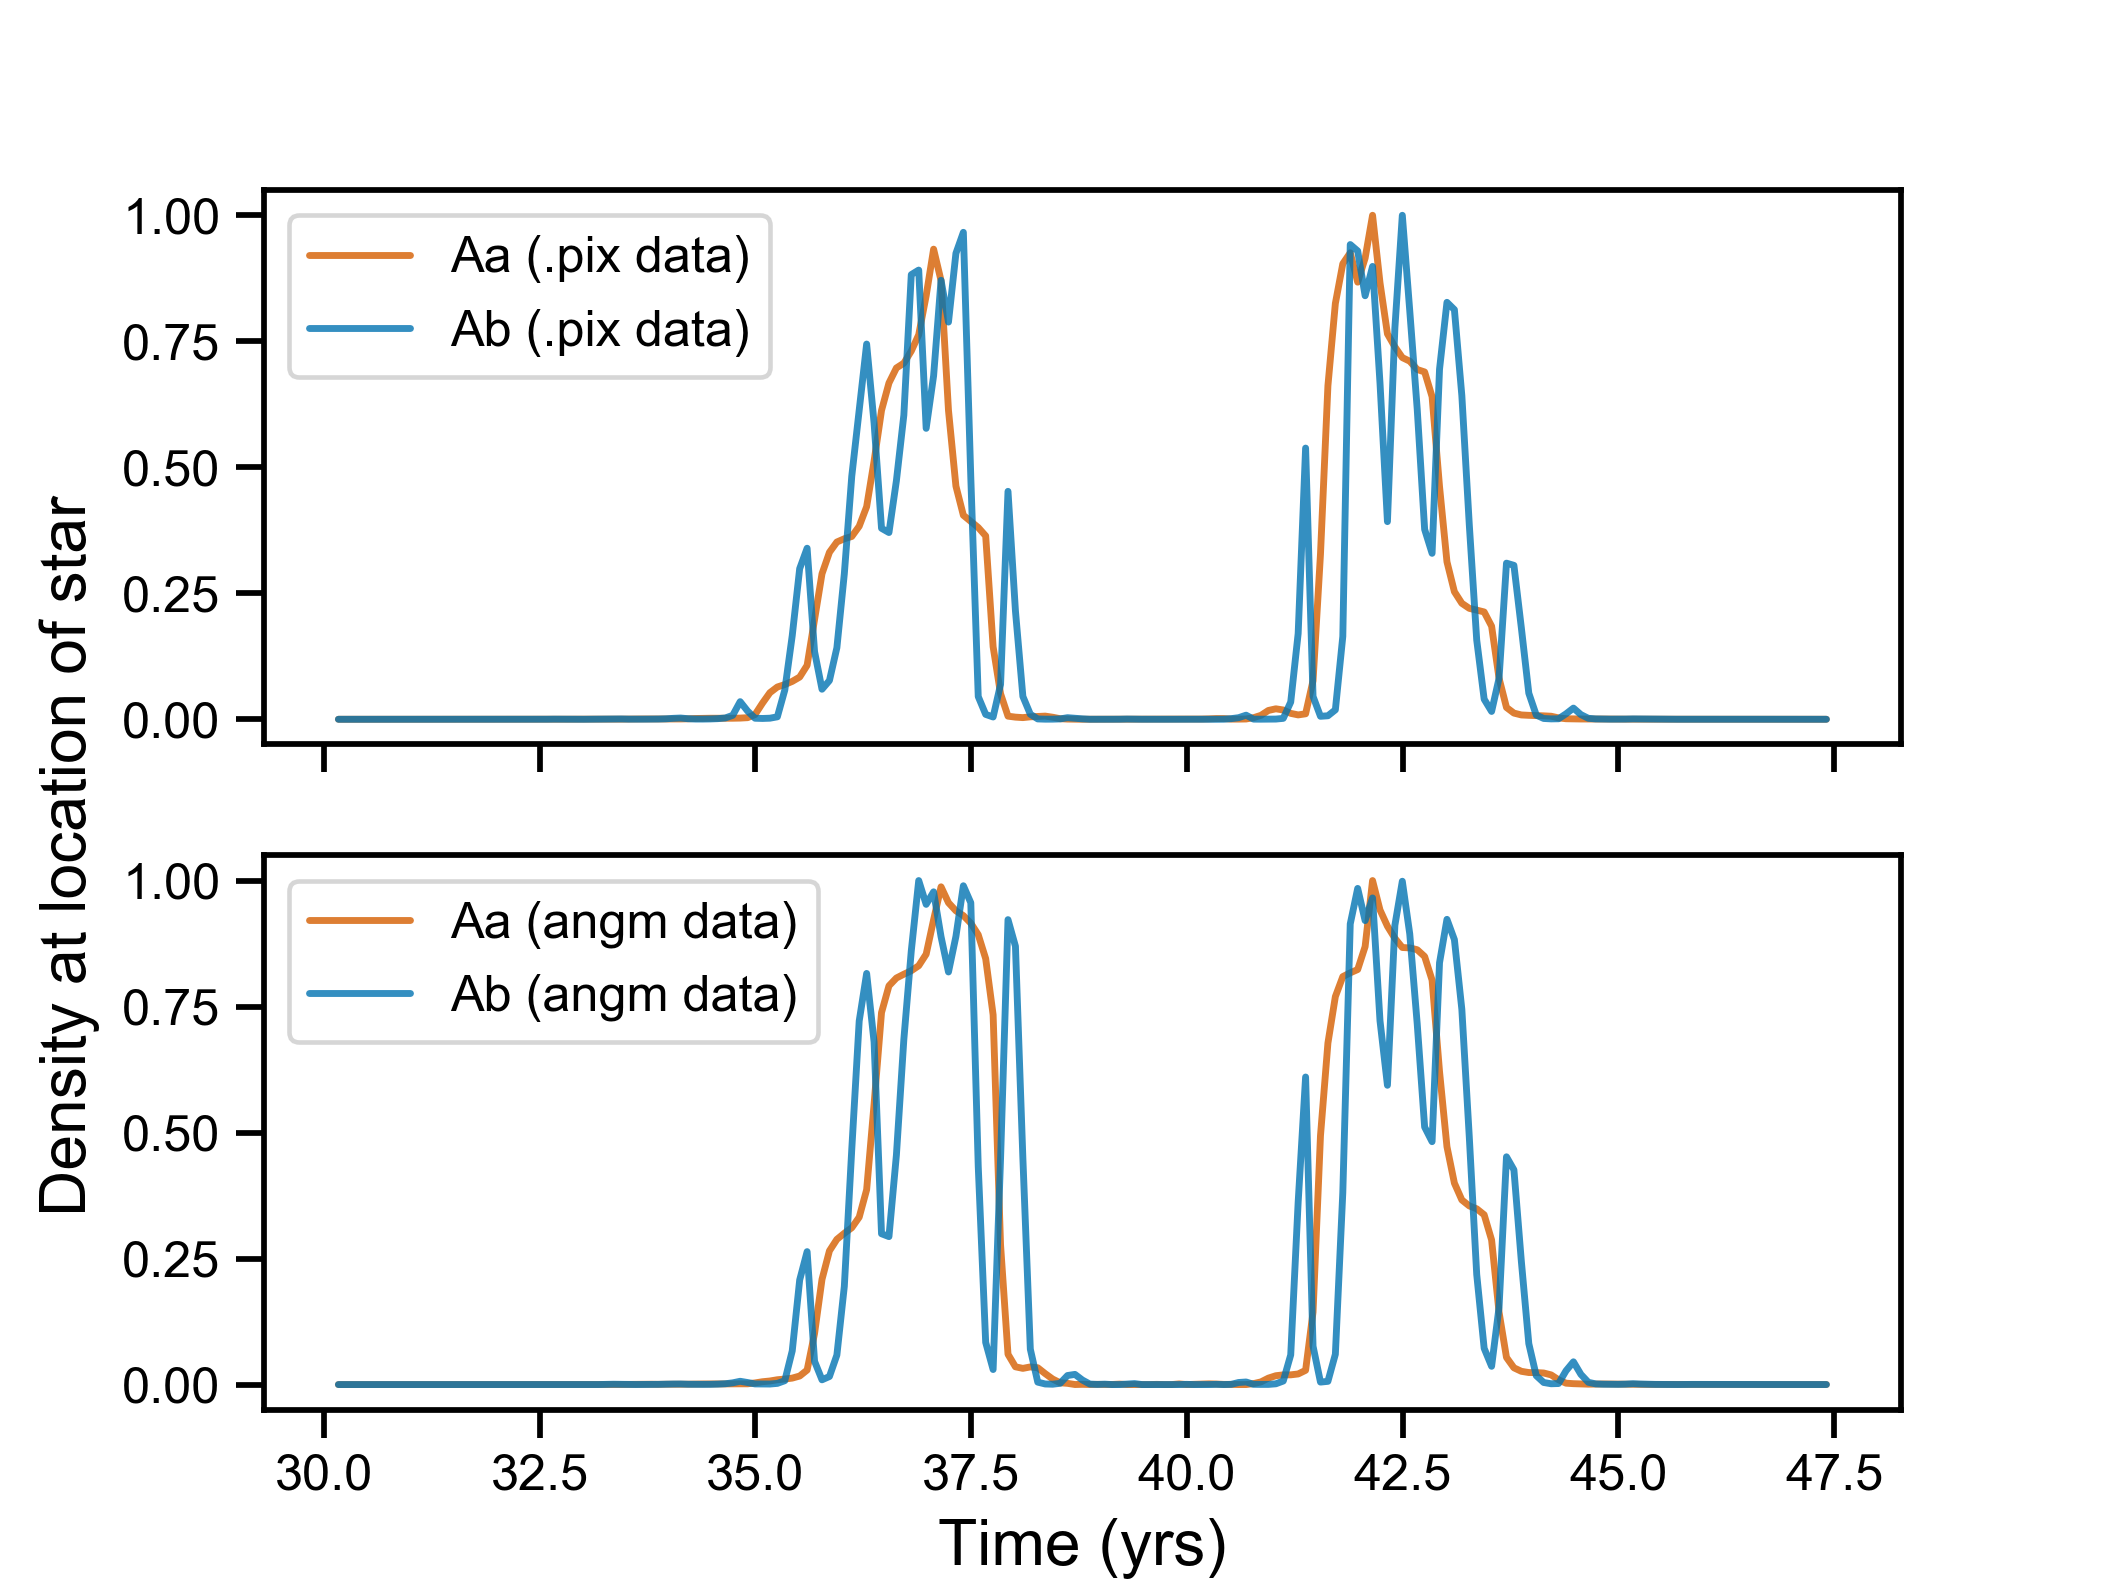

In [16]:
# # Plot axisymmetric and non-axisymmetric data side-by-side

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# cd_Aa_arr = 10**np.array(lcd_Aa)
# cd_Ab_arr = 10**np.array(lcd_Ab)
# sigma_Aa_arr = np.array(sigma_Aa)
# sigma_Ab_arr = np.array(sigma_Ab)

# norm_lcd_Aa = cd_Aa_arr/np.max(abs(cd_Aa_arr))
# norm_lcd_Ab = cd_Ab_arr/np.max(abs(cd_Ab_arr))
# norm_sigma_Aa = sigma_Aa_arr/np.max(abs(sigma_Aa_arr))
# norm_sigma_Ab = sigma_Ab_arr/np.max(abs(sigma_Ab_arr))
                            
# ax1.plot(times, norm_lcd_Aa, 'r', alpha=0.8, label='Aa (.pix data)')
# ax1.plot(times, norm_lcd_Ab, 'b',  alpha=0.8, label='Ab (.pix data)')
# ax2.plot(times, norm_sigma_Aa, 'r',  alpha=0.8, label='Aa (angm data)')
# ax2.plot(times, norm_sigma_Ab, 'b',  alpha=0.8, label='Ab (angm data)')

# plt.xlabel('Time (yrs)')
# plt.ylabel('Density at location of star')
# ax2.yaxis.set_label_coords(-.1, 1)
# ax2.legend()
# ax1.legend()


<IPython.core.display.Javascript object>


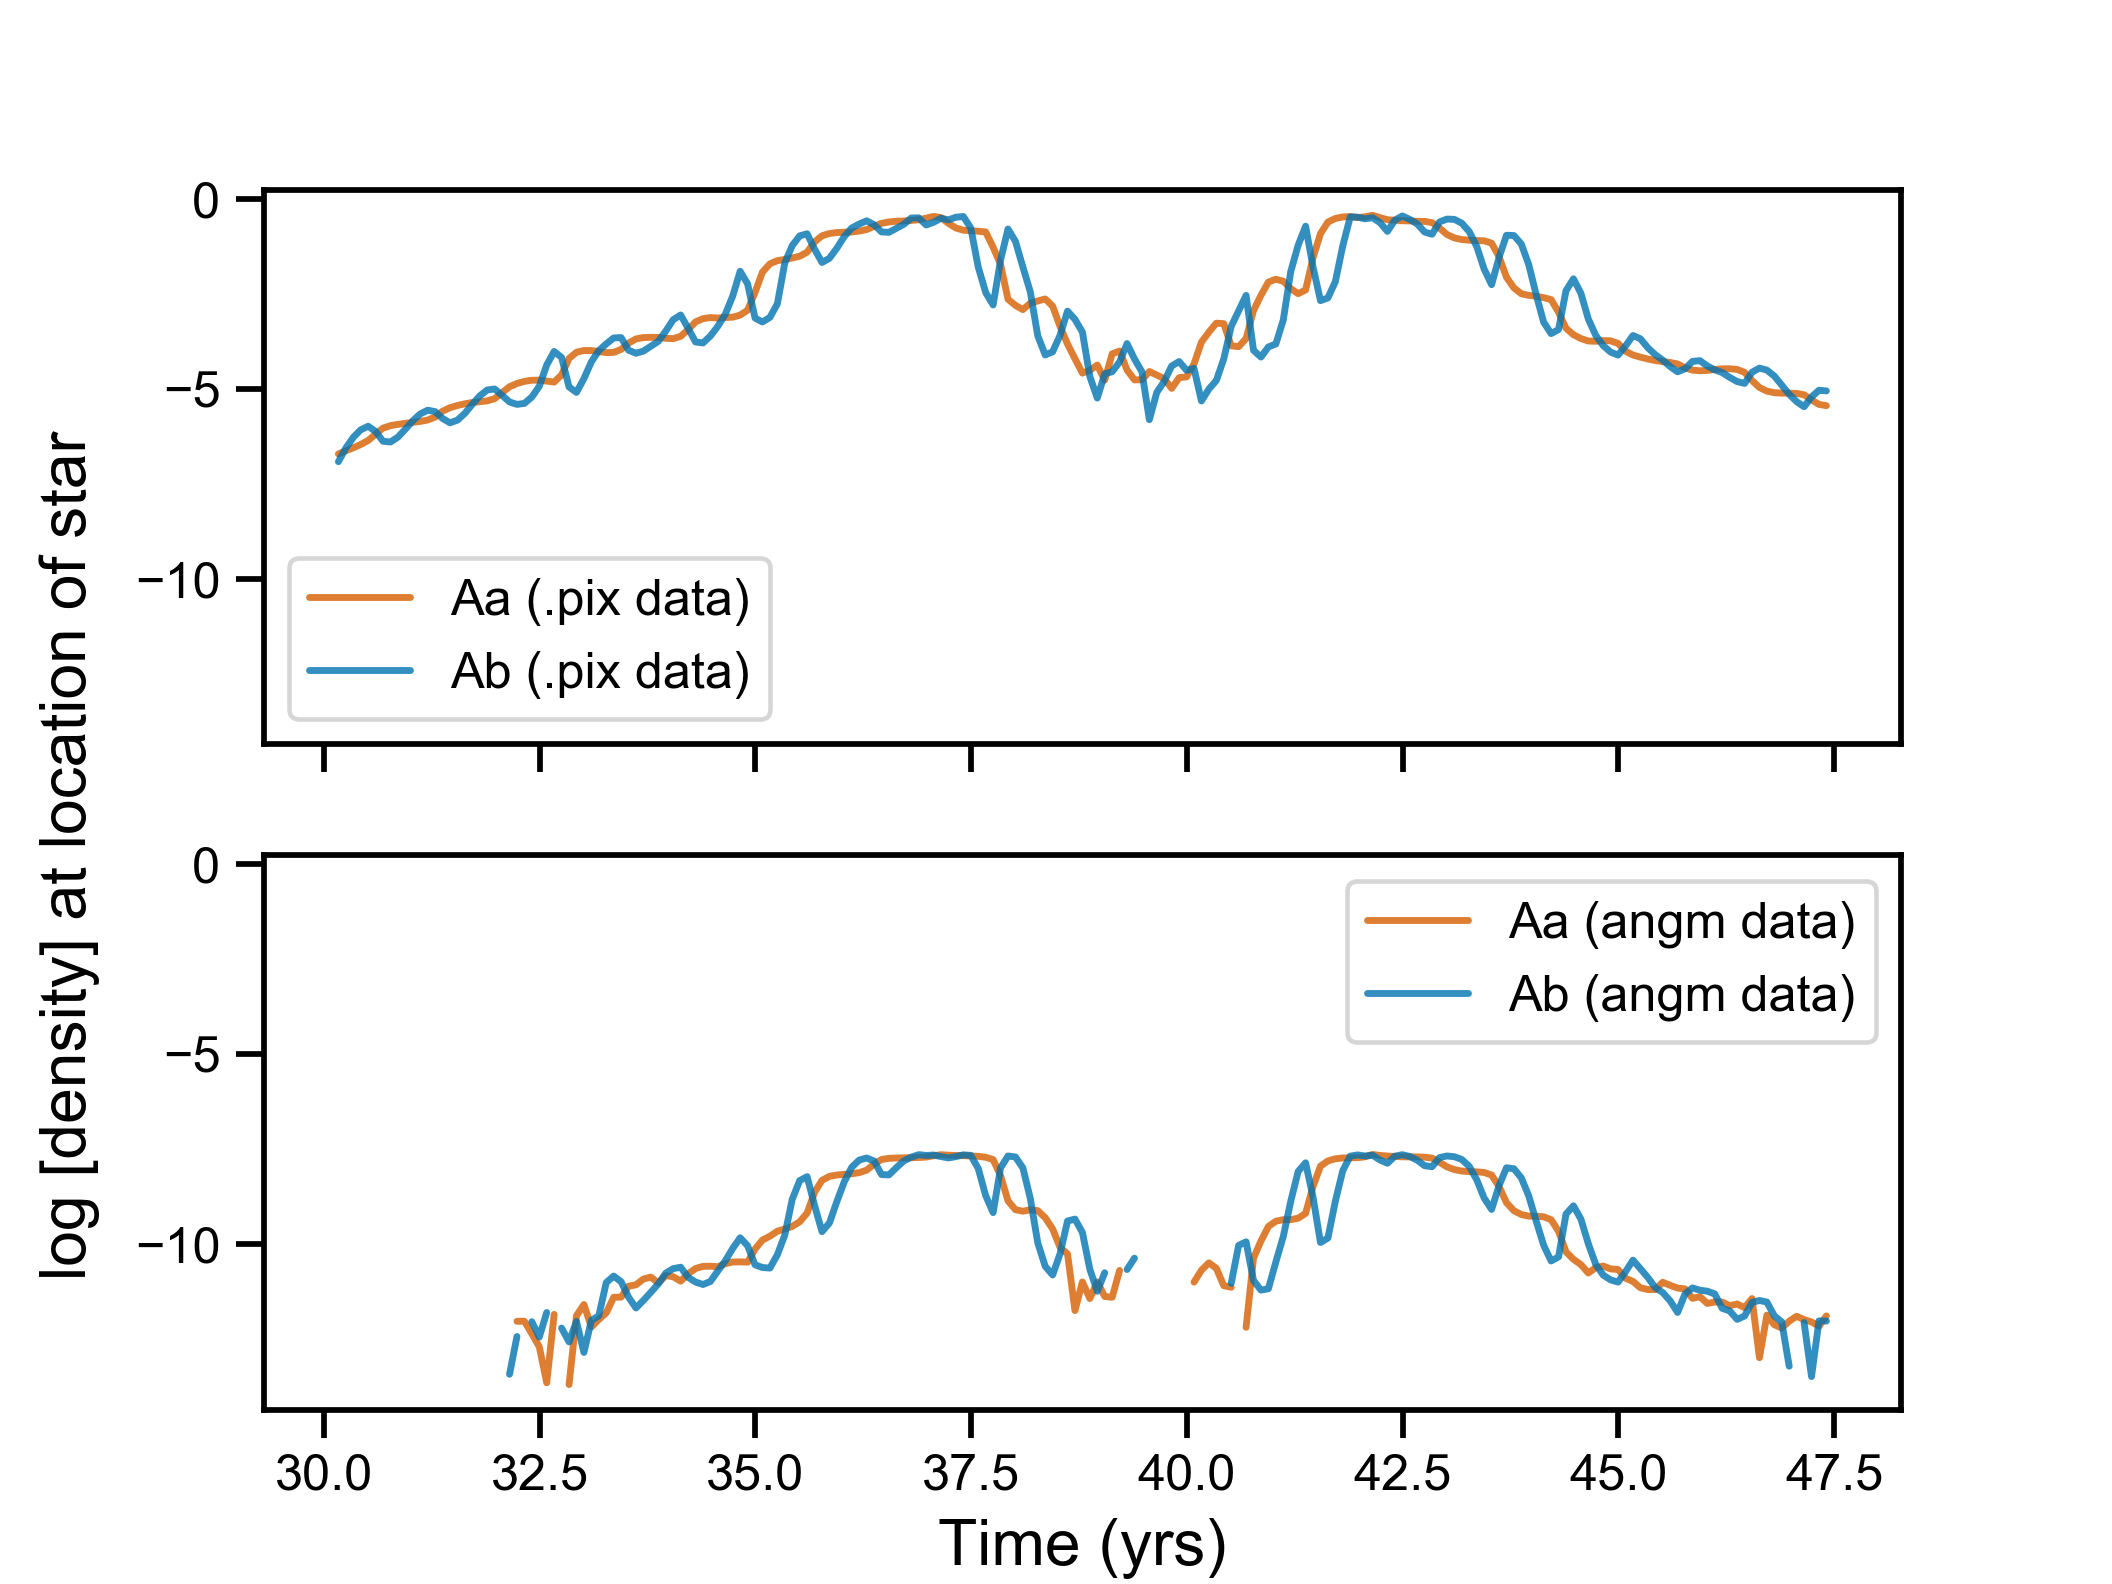

In [17]:
# # Plot log axisymmetric and non-axisymmetric data side-by-side


# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# lcd_Aa_arr = np.array(lcd_Aa)
# lcd_Ab_arr = np.array(lcd_Ab)
# sigma_Aa_arr = np.array(sigma_Aa)
# sigma_Ab_arr = np.array(sigma_Ab)
# sigma_Aa_arr[sigma_Aa_arr == 0] = np.nan
# sigma_Ab_arr[sigma_Ab_arr == 0] = np.nan
# log_sigma_Aa_arr = np.log10(sigma_Aa_arr)
# log_sigma_Ab_arr = np.log10(sigma_Ab_arr)

# # norm_lcd_Aa = lcd_Aa_arr/np.max(abs(lcd_Aa_arr))
# # norm_lcd_Ab = lcd_Ab_arr/np.max(abs(lcd_Ab_arr))
# # norm_sigma_Aa = log_sigma_Aa_arr/np.max(abs(log_sigma_Aa_arr))
# # norm_sigma_Ab = log_sigma_Ab_arr/np.max(abs(log_sigma_Ab_arr))
                            
# # plt.plot(times, norm_lcd_Aa, 'y', label='Aa (.pix data)')
# # plt.plot(times, norm_lcd_Ab, 'r', label='Ab (.pix data)')
# # plt.plot(times, norm_sigma_Aa, 'g', label='Aa (angm data)')
# # plt.plot(times, norm_sigma_Ab, 'b', label='Ab (angm data)')
# ax1.plot(times, lcd_Aa_arr, 'r',  alpha=0.8, label='Aa (.pix data)')
# ax1.plot(times, lcd_Ab_arr, 'b',  alpha=0.8, label='Ab (.pix data)')
# ax2.plot(times, log_sigma_Aa_arr, 'r',  alpha=0.8, label='Aa (angm data)')
# ax2.plot(times, log_sigma_Ab_arr, 'b',  alpha=0.8, label='Ab (angm data)')
# ax2.yaxis.set_label_coords(-.1, 1)

# plt.xlabel('Time (yrs)')
# plt.ylabel('log [density] at location of star')
# ax1.legend()
# ax2.legend()


In [10]:
# Calculate density from angm and .pix files as stars pass behind disc cavity

home_dir = "/storage/astro2/phrkvg/"
wd = "./hd98800/"
files = range(350,551,1)
sigma_limit = 0
cd_limit = 0

sigma_Aa = np.zeros(len(files))
sigma_Ab = np.zeros(len(files))
density_Aa = np.zeros(len(files))
density_Ab = np.zeros(len(files))
times = []

columns = ['radius', 'sigma', '<h>/H', 'lx', 'ly', 'lz', 'tilt', 'twist', 'psi', 'H/R', '|e|']

data1 = merge_ev_files(1, wd='./hd98800', ev_files=1)
data2 = merge_ev_files(2, wd='./hd98800', ev_files=1)
data3 = merge_ev_files(3, wd='./hd98800', ev_files=1)
data4 = merge_ev_files(4, wd='./hd98800', ev_files=1)

for i,file in enumerate(files):
    file_no = str(file).rjust(5, '0')
    file = home_dir+wd+"angm" + file_no
    code_time = float(open(file).readline().split()[-1])
    time = code_time/(2*np.pi)    # [years]
    times.append(time)
    angm_data = pd.read_csv(file, sep='\s+', skiprows=[0,1], engine='python', names=[columns[i] for i in range(11)]) 
    radii = np.array(angm_data['radius'])
    sigma = angm_data['sigma'].tolist()
    
    x_Aa = data3.loc[data3['0'] == code_time]['1']
    y_Aa = data3.loc[data3['0'] == code_time]['2']
    x_Ab = data1.loc[data1['0'] == code_time]['1']
    y_Ab = data1.loc[data1['0'] == code_time]['2']
    r_Aa = float((x_Aa**2 + y_Aa**2)**0.5)
    r_Ab = float((x_Ab**2 + y_Ab**2)**0.5)

#     i_Aa = np.nanargmin(abs(radii - r_Aa))
#     closest_r_Aa = radii[i_Aa]
#     i_Ab = np.nanargmin(abs(radii - r_Ab))
#     closest_r_Ab = radii[i_Ab]

    interp = interp1d(radii, sigma)
    if min(radii) < r_Aa < max(radii):
        sigma_at_Aa = interp(r_Aa)
    else:
        sigma_at_Aa = 0

    if min(radii) < r_Ab < max(radii):
        sigma_at_Ab = interp(r_Ab)
    else:
        sigma_at_Ab = 0

    if sigma_at_Aa > sigma_limit:
        sigma_Aa[i] = sigma_at_Aa

    if sigma_at_Ab > sigma_limit:
        sigma_Ab[i] = sigma_at_Ab
        
    pix_file = home_dir + wd + "newdump_" + file_no + "_logcolumndensitygcm2_proj.pix"

    xmin, xmax = open(pix_file).readlines()[6].split()[-4::3]
    xrange = float(xmax) - float(xmin)
    ymin, ymax = open(pix_file).readlines()[7].split()[-4::3]
    yrange = float(ymax) - float(ymin)
    pix_data = np.array(pd.read_csv(pix_file, sep='\s+', skiprows=10, engine='python'))
    dx = xrange/pix_data.shape[1]
    dy = yrange/pix_data.shape[0]
        
    xi_Aa = (x_Aa - float(xmin))/dx
    yi_Aa = (y_Aa - float(ymin))/dy
    xi_Ab = (x_Ab - float(xmin))/dx
    yi_Ab = (y_Ab - float(ymin))/dy
    
    xcoords = np.arange(pix_data.shape[1])
    ycoords = np.arange(pix_data.shape[0])
    lin_interp = interp2d(xcoords, ycoords, pix_data)
    z_Aa = lin_interp(xi_Aa, yi_Aa)
    z_Ab = lin_interp(xi_Ab, yi_Ab)
#     print(10**z_Aa, sigma_at_Aa*(1.989e33)/(1.496e13)**2)
        
    if cd_limit < 10**(z_Aa[0]):
        density_Aa[i] = 10**(z_Aa[0])
    else:
        density_Aa[i] = cd_limit

    if cd_limit < 10**(z_Ab[0]):
        density_Ab[i] = 10**(z_Ab[0])
    else:
        density_Ab[i]  = cd_limit
    


<IPython.core.display.Javascript object>


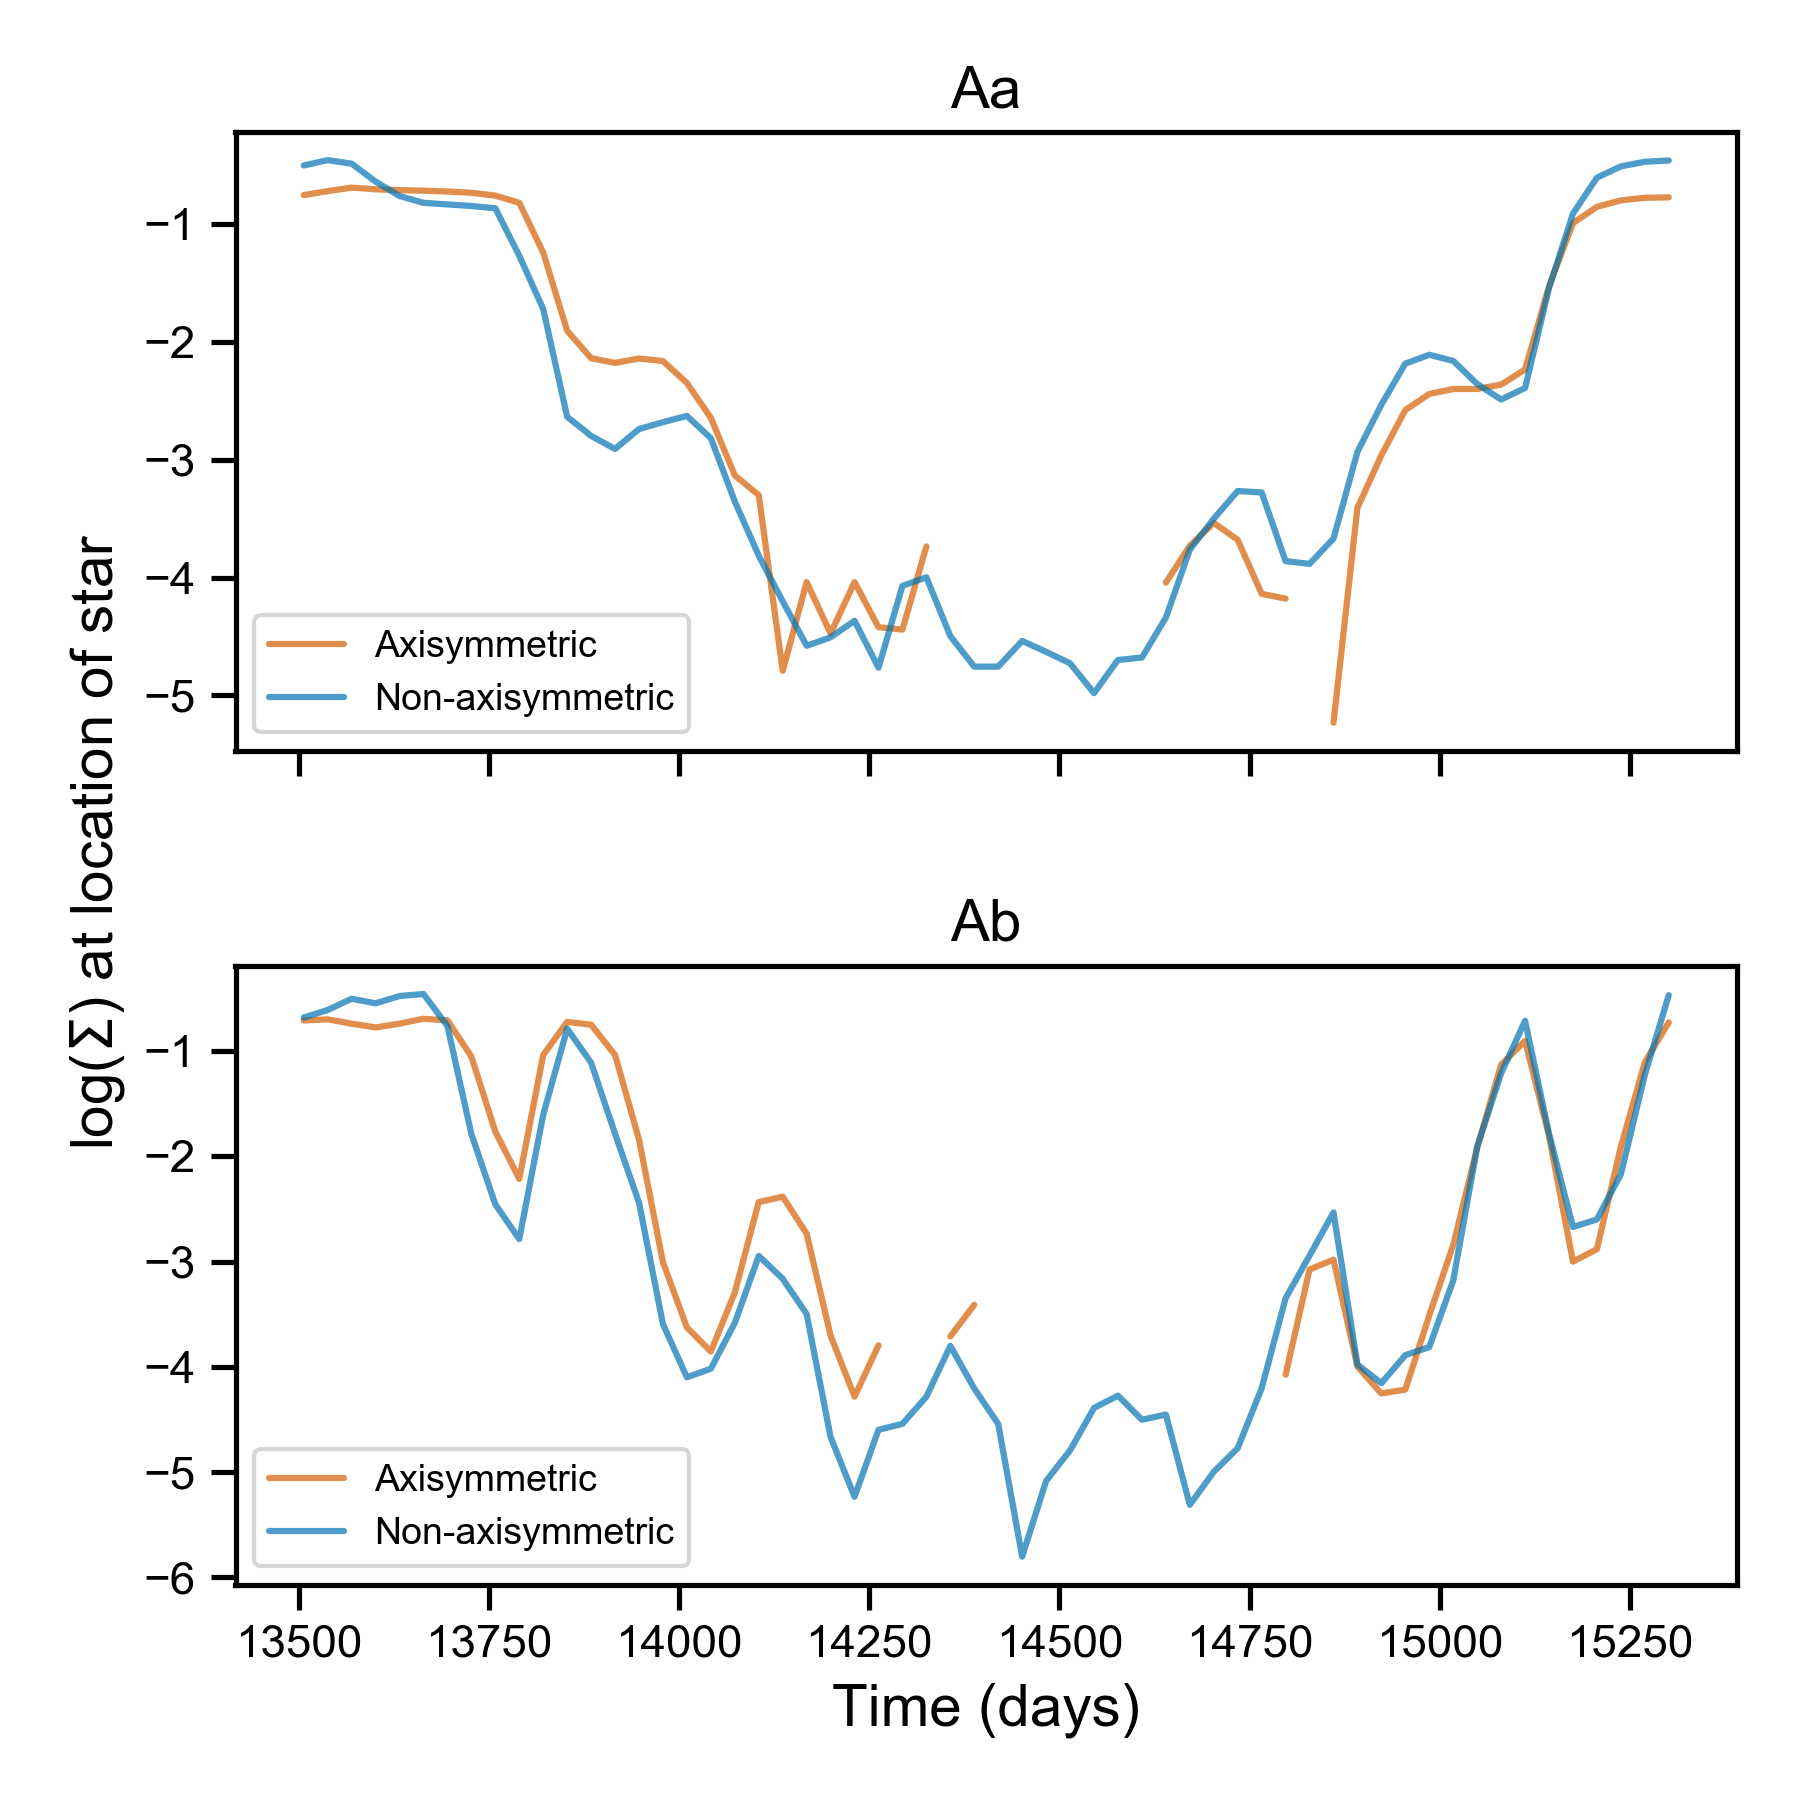

First dumpfile:  429
Last dumpfile:  487


/storage/astro2/phrkvg/env/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/storage/astro2/phrkvg/env/lib64/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


In [12]:
# Plot log density as stars pass behind disc cavity

fig_transit, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)
start = 37
end =  42

# Convert units to g/cm2
sigma_Aa_gcm2 = sigma_Aa*(1.989e33)/(1.496e13)**2
sigma_Ab_gcm2 = sigma_Ab*(1.989e33)/(1.496e13)**2
 
ti = int((start-30.16)/(0.1*0.862))
tf = int((end-30.16)/(0.1*0.862))
print('First dumpfile: ', ti+350)
print('Last dumpfile: ', tf+350)
t = np.array(times)*365.25


ax[0].set_title('Aa')
ax[0].plot(t[ti:tf], (np.log10(sigma_Aa_gcm2))[ti:tf], 'r', label='Axisymmetric', alpha=0.7, figure=fig_transit)
ax[0].plot(t[ti:tf], (np.log10((density_Aa)))[ti:tf], 'b', label='Non-axisymmetric', alpha=0.7, figure=fig_transit)
leg0 = ax[0].legend(prop={'size': 9})
# frame = leg0.get_frame()
# frame.set_facecolor('black')

ax[1].set_title('Ab')
ax[1].plot(t[ti:tf], (np.log10(sigma_Ab_gcm2))[ti:tf], 'r', label='Axisymmetric', alpha=0.7, figure=fig_transit)
ax[1].plot(t[ti:tf], (np.log10((density_Ab)))[ti:tf], 'b', label='Non-axisymmetric', alpha=0.7, figure=fig_transit)
ax[1].set_xlabel('Time (days)')
leg1 = ax[1].legend(prop={'size': 9})
ax[1].set_ylabel('log($\Sigma$) at location of star', position=(-0.05, 1.2))

# frame = leg1.get_frame()
# frame.set_facecolor('black')

plt.tight_layout()


<IPython.core.display.Javascript object>


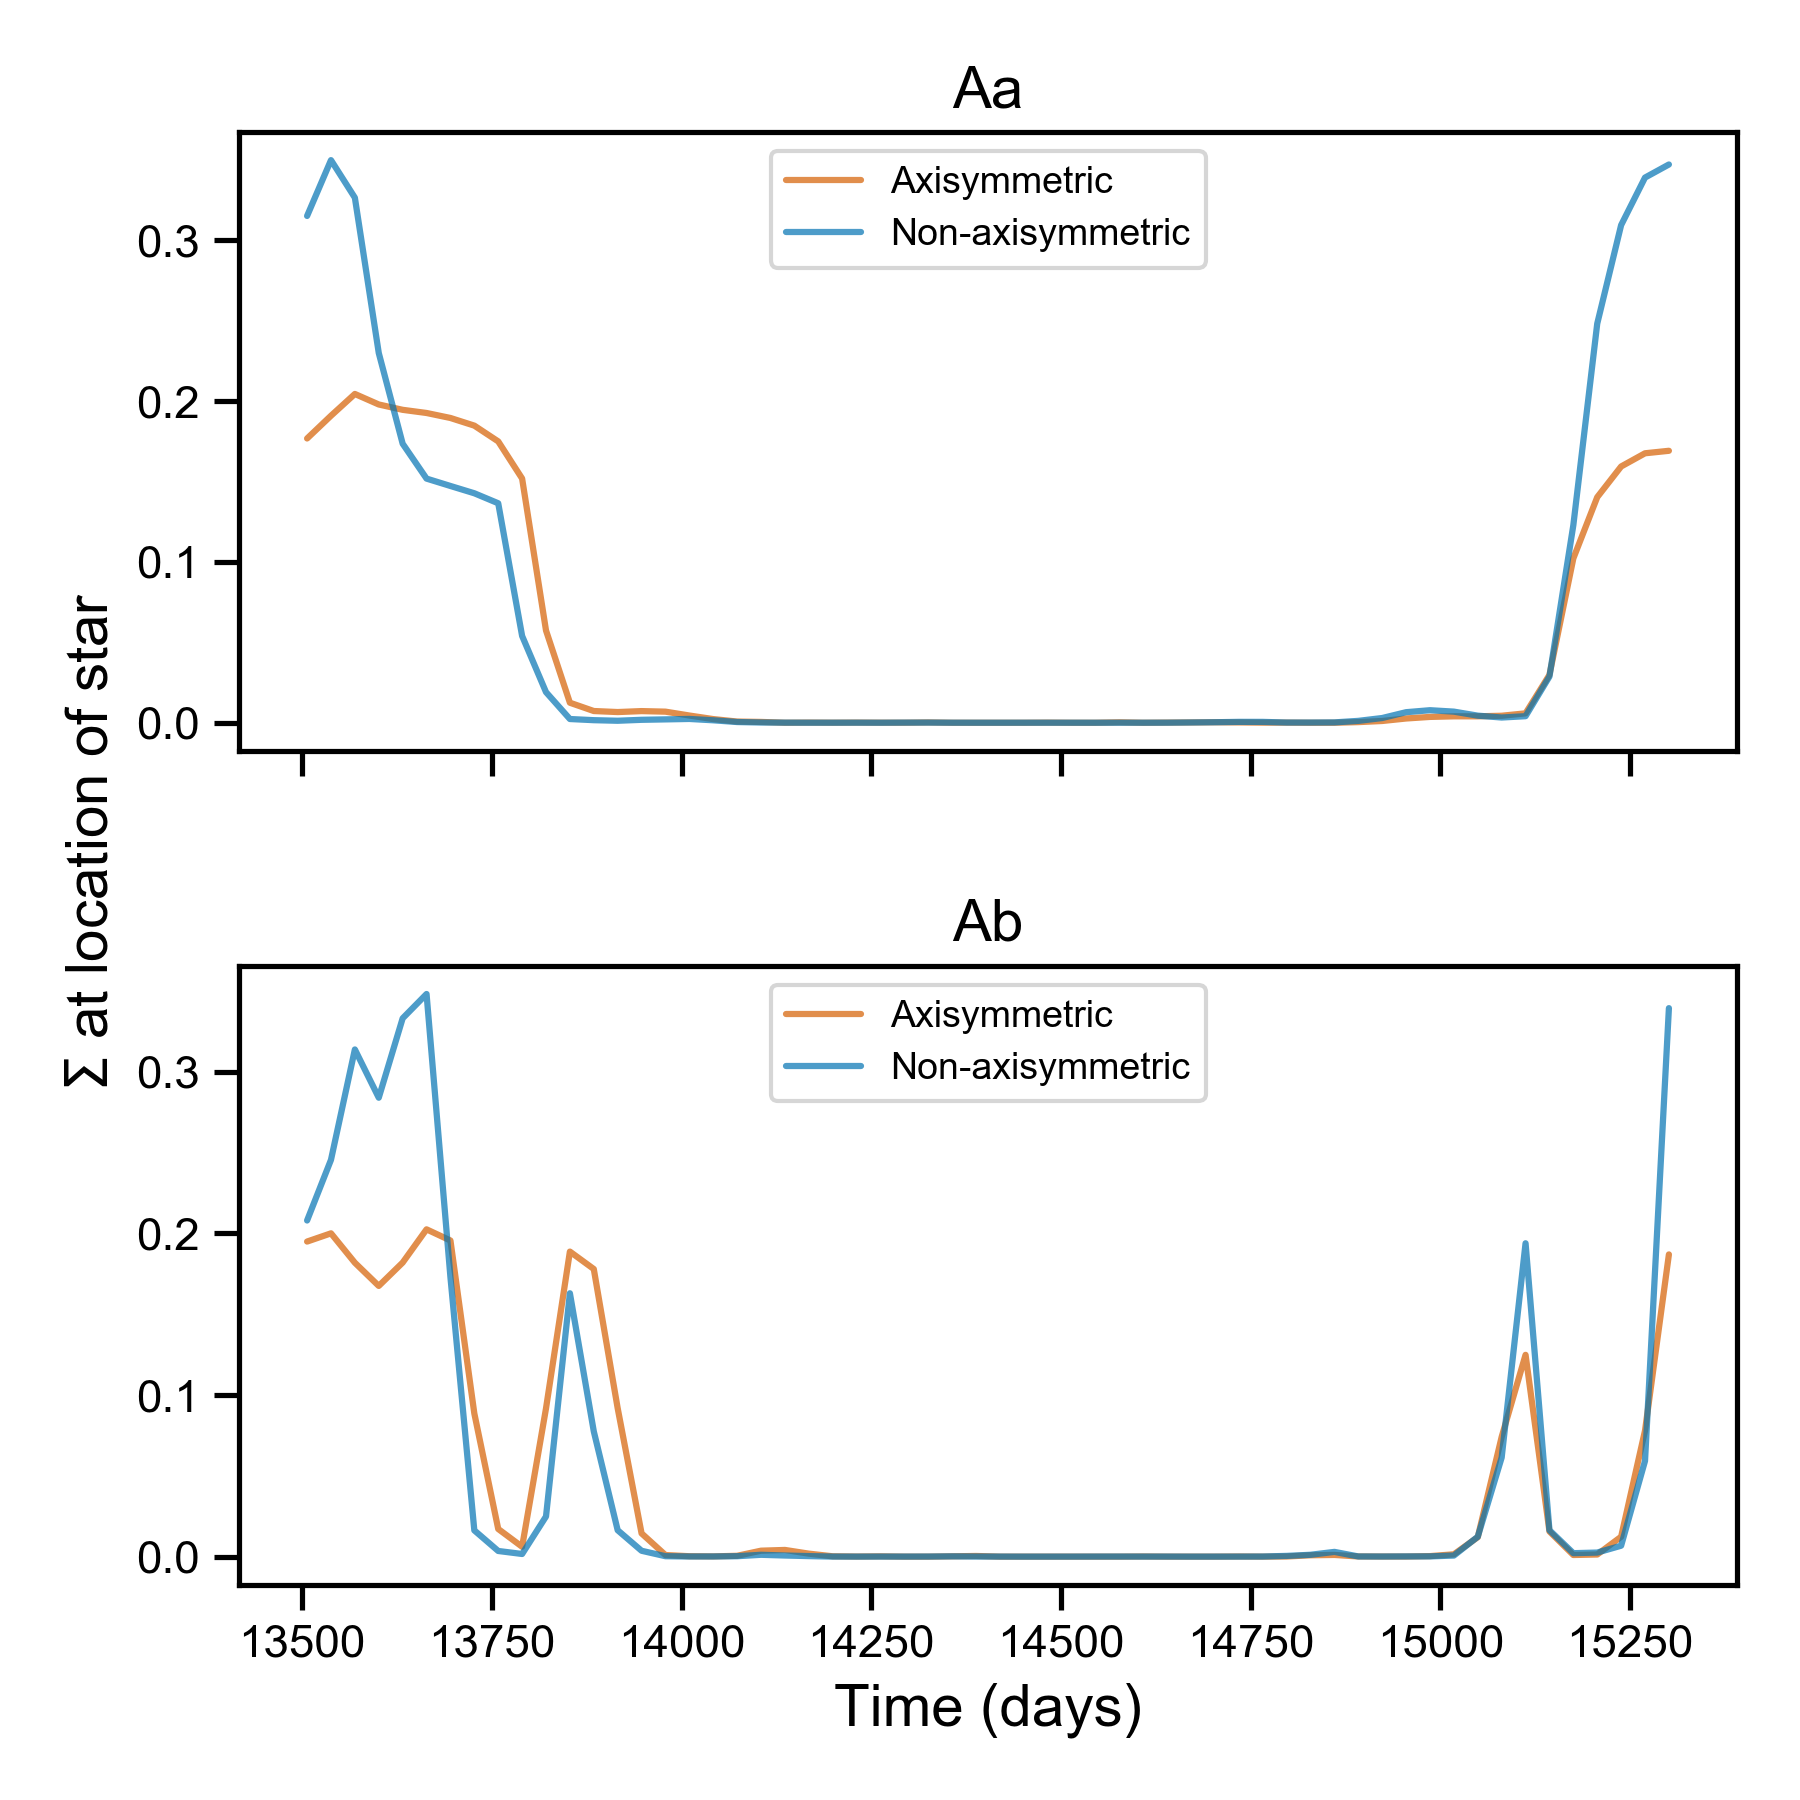

First dumpfile:  429
Last dumpfile:  487


In [13]:
# Plot density as stars pass behind disc cavity

fig_transit, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)
start = 37
end =  42

# Convert units to g/cm2
sigma_Aa_gcm2 = (sigma_Aa*(1.989e33)/(1.496e13)**2) 
sigma_Ab_gcm2 = (sigma_Ab*(1.989e33)/(1.496e13)**2)

ti = int((start-30.16)/(0.1*0.862))
tf = int((end-30.16)/(0.1*0.862))
print('First dumpfile: ', ti+350)
print('Last dumpfile: ', tf+350)
t = np.array(times)*365.25


ax[0].set_title('Aa')
ax[0].plot(t[ti:tf], sigma_Aa_gcm2[ti:tf], 'r', label='Axisymmetric', alpha=0.7, figure=fig_transit)
ax[0].plot(t[ti:tf], density_Aa[ti:tf], 'b', label='Non-axisymmetric', alpha=0.7, figure=fig_transit)
# ax[0].set_ylim(-6,0)
leg0 = ax[0].legend(prop={'size': 9})
# frame = leg0.get_frame()
# frame.set_facecolor('black')

ax[1].set_title('Ab')
ax[1].plot(t[ti:tf], sigma_Ab_gcm2[ti:tf], 'r', label='Axisymmetric', alpha=0.7, figure=fig_transit)
ax[1].plot(t[ti:tf], density_Ab[ti:tf], 'b', label='Non-axisymmetric', alpha=0.7, figure=fig_transit)
ax[1].set_xlabel('Time (days)')
# ax[1].set_ylim(-6,1)
leg1 = ax[1].legend(prop={'size': 9})
ax[1].set_ylabel('$\Sigma$ at location of star', position=(-0.05, 1.2))

# frame = leg1.get_frame()
# frame.set_facecolor('black')

plt.tight_layout()


In [15]:
# Calculate density from angm and .pix files as stars pass behind disc cavity

home_dir = "/storage/astro2/phrkvg/"
wd = "./hd98800_highdt/"
files = range(421,1701,1)
sigma_limit = 0
cd_limit = 0

sigma_Aa = np.zeros(len(files))
sigma_Ab = np.zeros(len(files))
density_Aa = np.zeros(len(files))
density_Ab = np.zeros(len(files))
times = []

columns = ['radius', 'sigma', '<h>/H', 'lx', 'ly', 'lz', 'tilt', 'twist', 'psi', 'H/R', '|e|']

data1 = merge_ev_files(1, wd=wd, ev_files=2)
data2 = merge_ev_files(2, wd=wd, ev_files=2)
data3 = merge_ev_files(3, wd=wd, ev_files=2)
data4 = merge_ev_files(4, wd=wd, ev_files=2)

for i,file in enumerate(files):
    file_no = str(file).rjust(5, '0')
    file = home_dir+wd+"angm" + file_no
    code_time = float(open(file).readline().split()[-1])
    time = code_time/(2*np.pi)    # [years]
    times.append(time)
    angm_data = pd.read_csv(file, sep='\s+', skiprows=[0,1], engine='python', names=[columns[i] for i in range(11)]) 
    radii = np.array(angm_data['radius'])
    sigma = angm_data['sigma'].tolist()
#     print(code_time, data3['0'][i])
    
#     x_Aa =  data3['1'][i]
#     y_Aa =  data3['2'][i]
#     x_Ab =  data1['1'][i]
#     y_Ab =  data1['2'][i]

    x_Aa = data3.loc[abs(data3['0'] - code_time) < 1e-9]['1'].iloc[0]
    y_Aa = data3.loc[abs(data3['0'] - code_time) < 1e-9]['2'].iloc[0]
    x_Ab = data1.loc[abs(data1['0'] - code_time) < 1e-9]['1'].iloc[0]
    y_Ab = data1.loc[abs(data1['0'] - code_time) < 1e-9]['2'].iloc[0]

    r_Aa = float((x_Aa**2 + y_Aa**2)**0.5)
    r_Ab = float((x_Ab**2 + y_Ab**2)**0.5)

    i_Aa = np.nanargmin(abs(radii - r_Aa))
    i_Ab = np.nanargmin(abs(radii - r_Ab))

    interp = interp1d(radii, sigma)
    if min(radii) < r_Aa < max(radii):
        sigma_at_Aa = interp(r_Aa)
#         print(sigma[i_Aa],sigma[i_Aa-1], sigma[i_Aa+1],sigma_at_Aa)
    else:
        sigma_at_Aa = 0

    if min(radii) < r_Ab < max(radii):
        sigma_at_Ab = interp(r_Ab)
#         print(sigma[i_Ab], sigma_at_Ab)
    else:
        sigma_at_Ab = 0

    if sigma_at_Aa > sigma_limit:
        sigma_Aa[i] = sigma_at_Aa

    if sigma_at_Ab > sigma_limit:
        sigma_Ab[i] = sigma_at_Ab
    

    pix_file = home_dir + wd + "newdump_" + file_no + "_logcolumndensitygcm2_proj.pix"

    xmin, xmax = open(pix_file).readlines()[6].split()[-4::3]
    xrange = float(xmax) - float(xmin)
    ymin, ymax = open(pix_file).readlines()[7].split()[-4::3]
    yrange = float(ymax) - float(ymin)
    pix_data = np.array(pd.read_csv(pix_file, sep='\s+', skiprows=10, engine='python'))
#     print(pix_data.shape)
    dx = xrange/pix_data.shape[1]
    dy = yrange/pix_data.shape[0]
    
    # Get indexes of cells where Aa and Ab are located (not integers)
    xi_Aa = (x_Aa - float(xmin))/dx     
    yi_Aa = (y_Aa - float(ymin))/dy
    xi_Ab = (x_Ab - float(xmin))/dx
    yi_Ab = (y_Ab - float(ymin))/dy
    
    xcoords = np.arange(pix_data.shape[1])
    ycoords = np.arange(pix_data.shape[0])
    # Interpolator using x,y indexes and density data
    lin_interp = interp2d(xcoords, ycoords, pix_data)
    z_Aa = lin_interp(xi_Aa, yi_Aa)
    z_Ab = lin_interp(xi_Ab, yi_Ab)
#     print(z_Aa, sigma_at_Aa*(1.989e33)/(1.496e13)**2)
        
    if cd_limit < 10**z_Aa:
        density_Aa[i] = 10**z_Aa[0]
#         print(pix_data[int(xi_Aa),int(yi_Aa)], pix_data[int(xi_Aa)+1,int(yi_Aa)+1],z_Aa[0])
    else:
        density_Aa[i] = cd_limit

    if cd_limit < 10**z_Ab:
        density_Ab[i] = 10**z_Ab[0]
    else:
        density_Ab[i]  = cd_limit
    


<IPython.core.display.Javascript object>


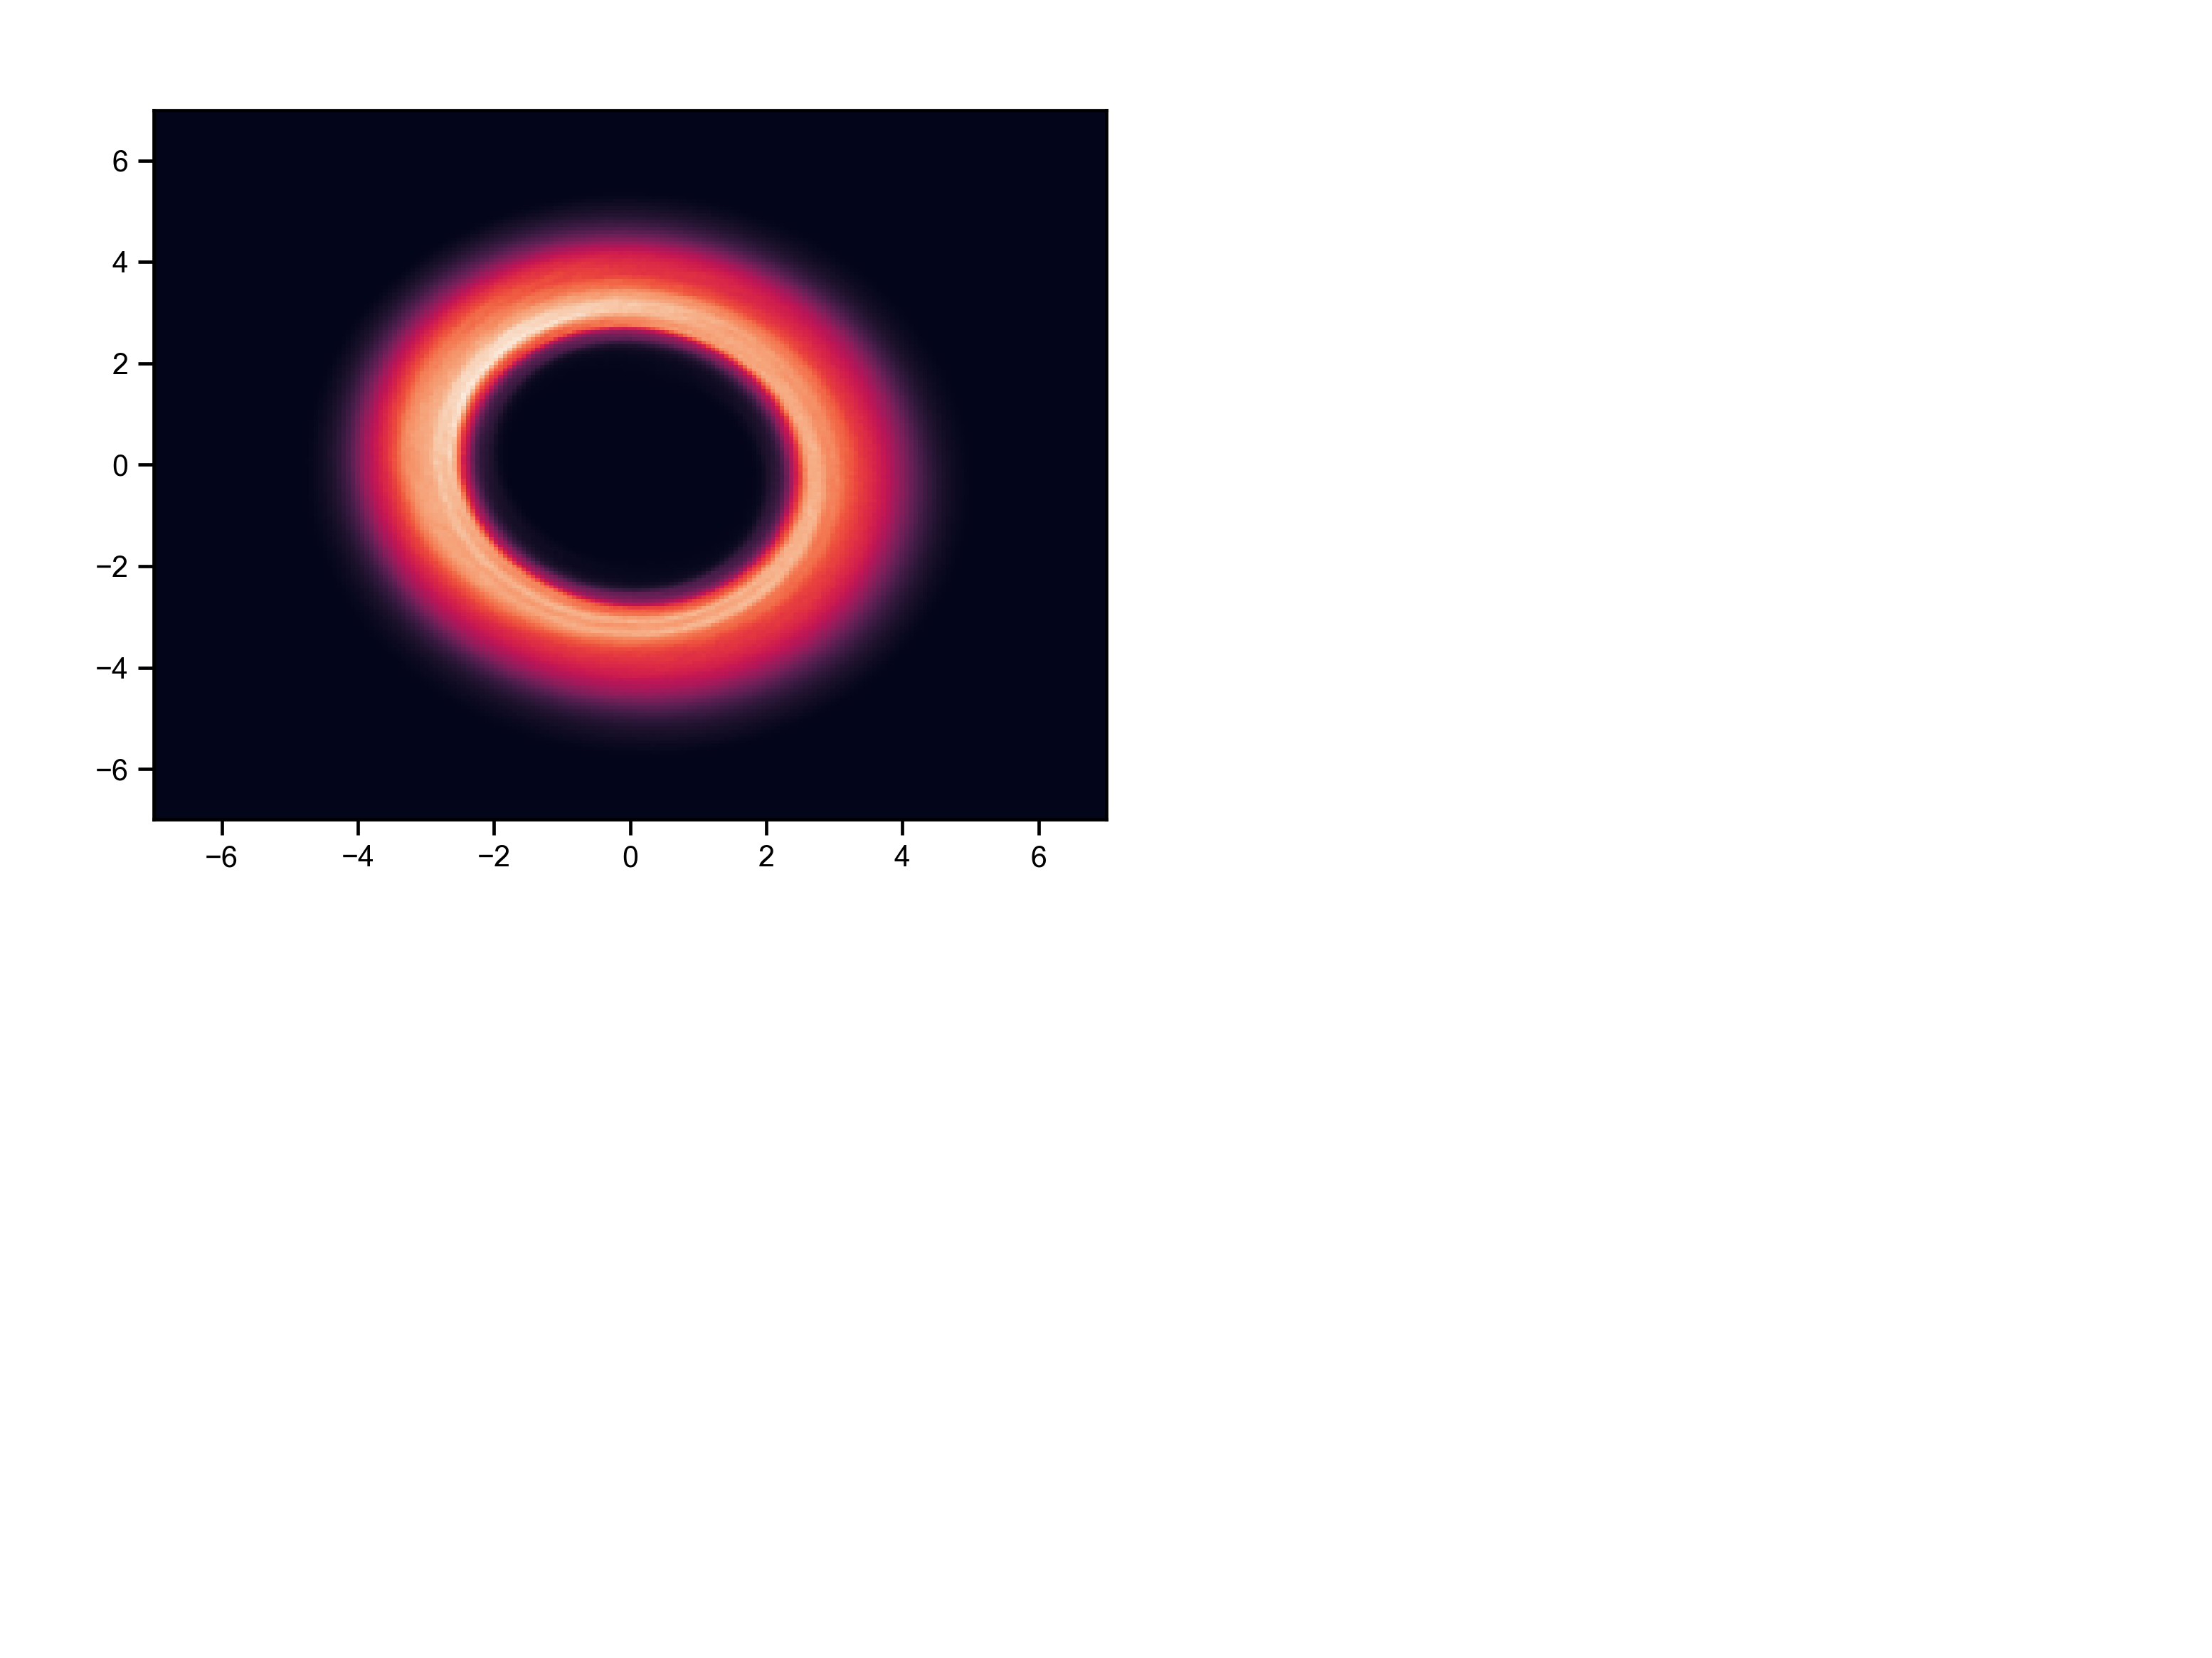

(549, 222)
(549, 222) (549, 222)


/storage/astro2/phrkvg/env/lib64/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


(-7.0, 7.0)

In [9]:
plt.figure()
file_no = 450
pix_file = "hd98800_highdt/newdump_00" + str(file_no) + "_logcolumndensitygcm2_proj.pix"

xmin, xmax = open(pix_file).readlines()[6].split()[-4::3]
xrange = float(xmax) - float(xmin)
ymin, ymax = open(pix_file).readlines()[7].split()[-4::3]
yrange = float(ymax) - float(ymin)
pix_data = np.array(pd.read_csv(pix_file, sep='\s+', skiprows=10, engine='python'))

print(pix_data.shape)

xcoords = np.linspace(float(xmin), float(xmax), pix_data.shape[1])
ycoords = np.linspace(float(ymin), float(ymax), pix_data.shape[0])

X,Y = np.meshgrid(xcoords,ycoords)
print(X.shape, Y.shape)
plt.pcolormesh(X,Y,10**pix_data)
plt.xlim(-7,7)
plt.ylim(-7,7)


<IPython.core.display.Javascript object>


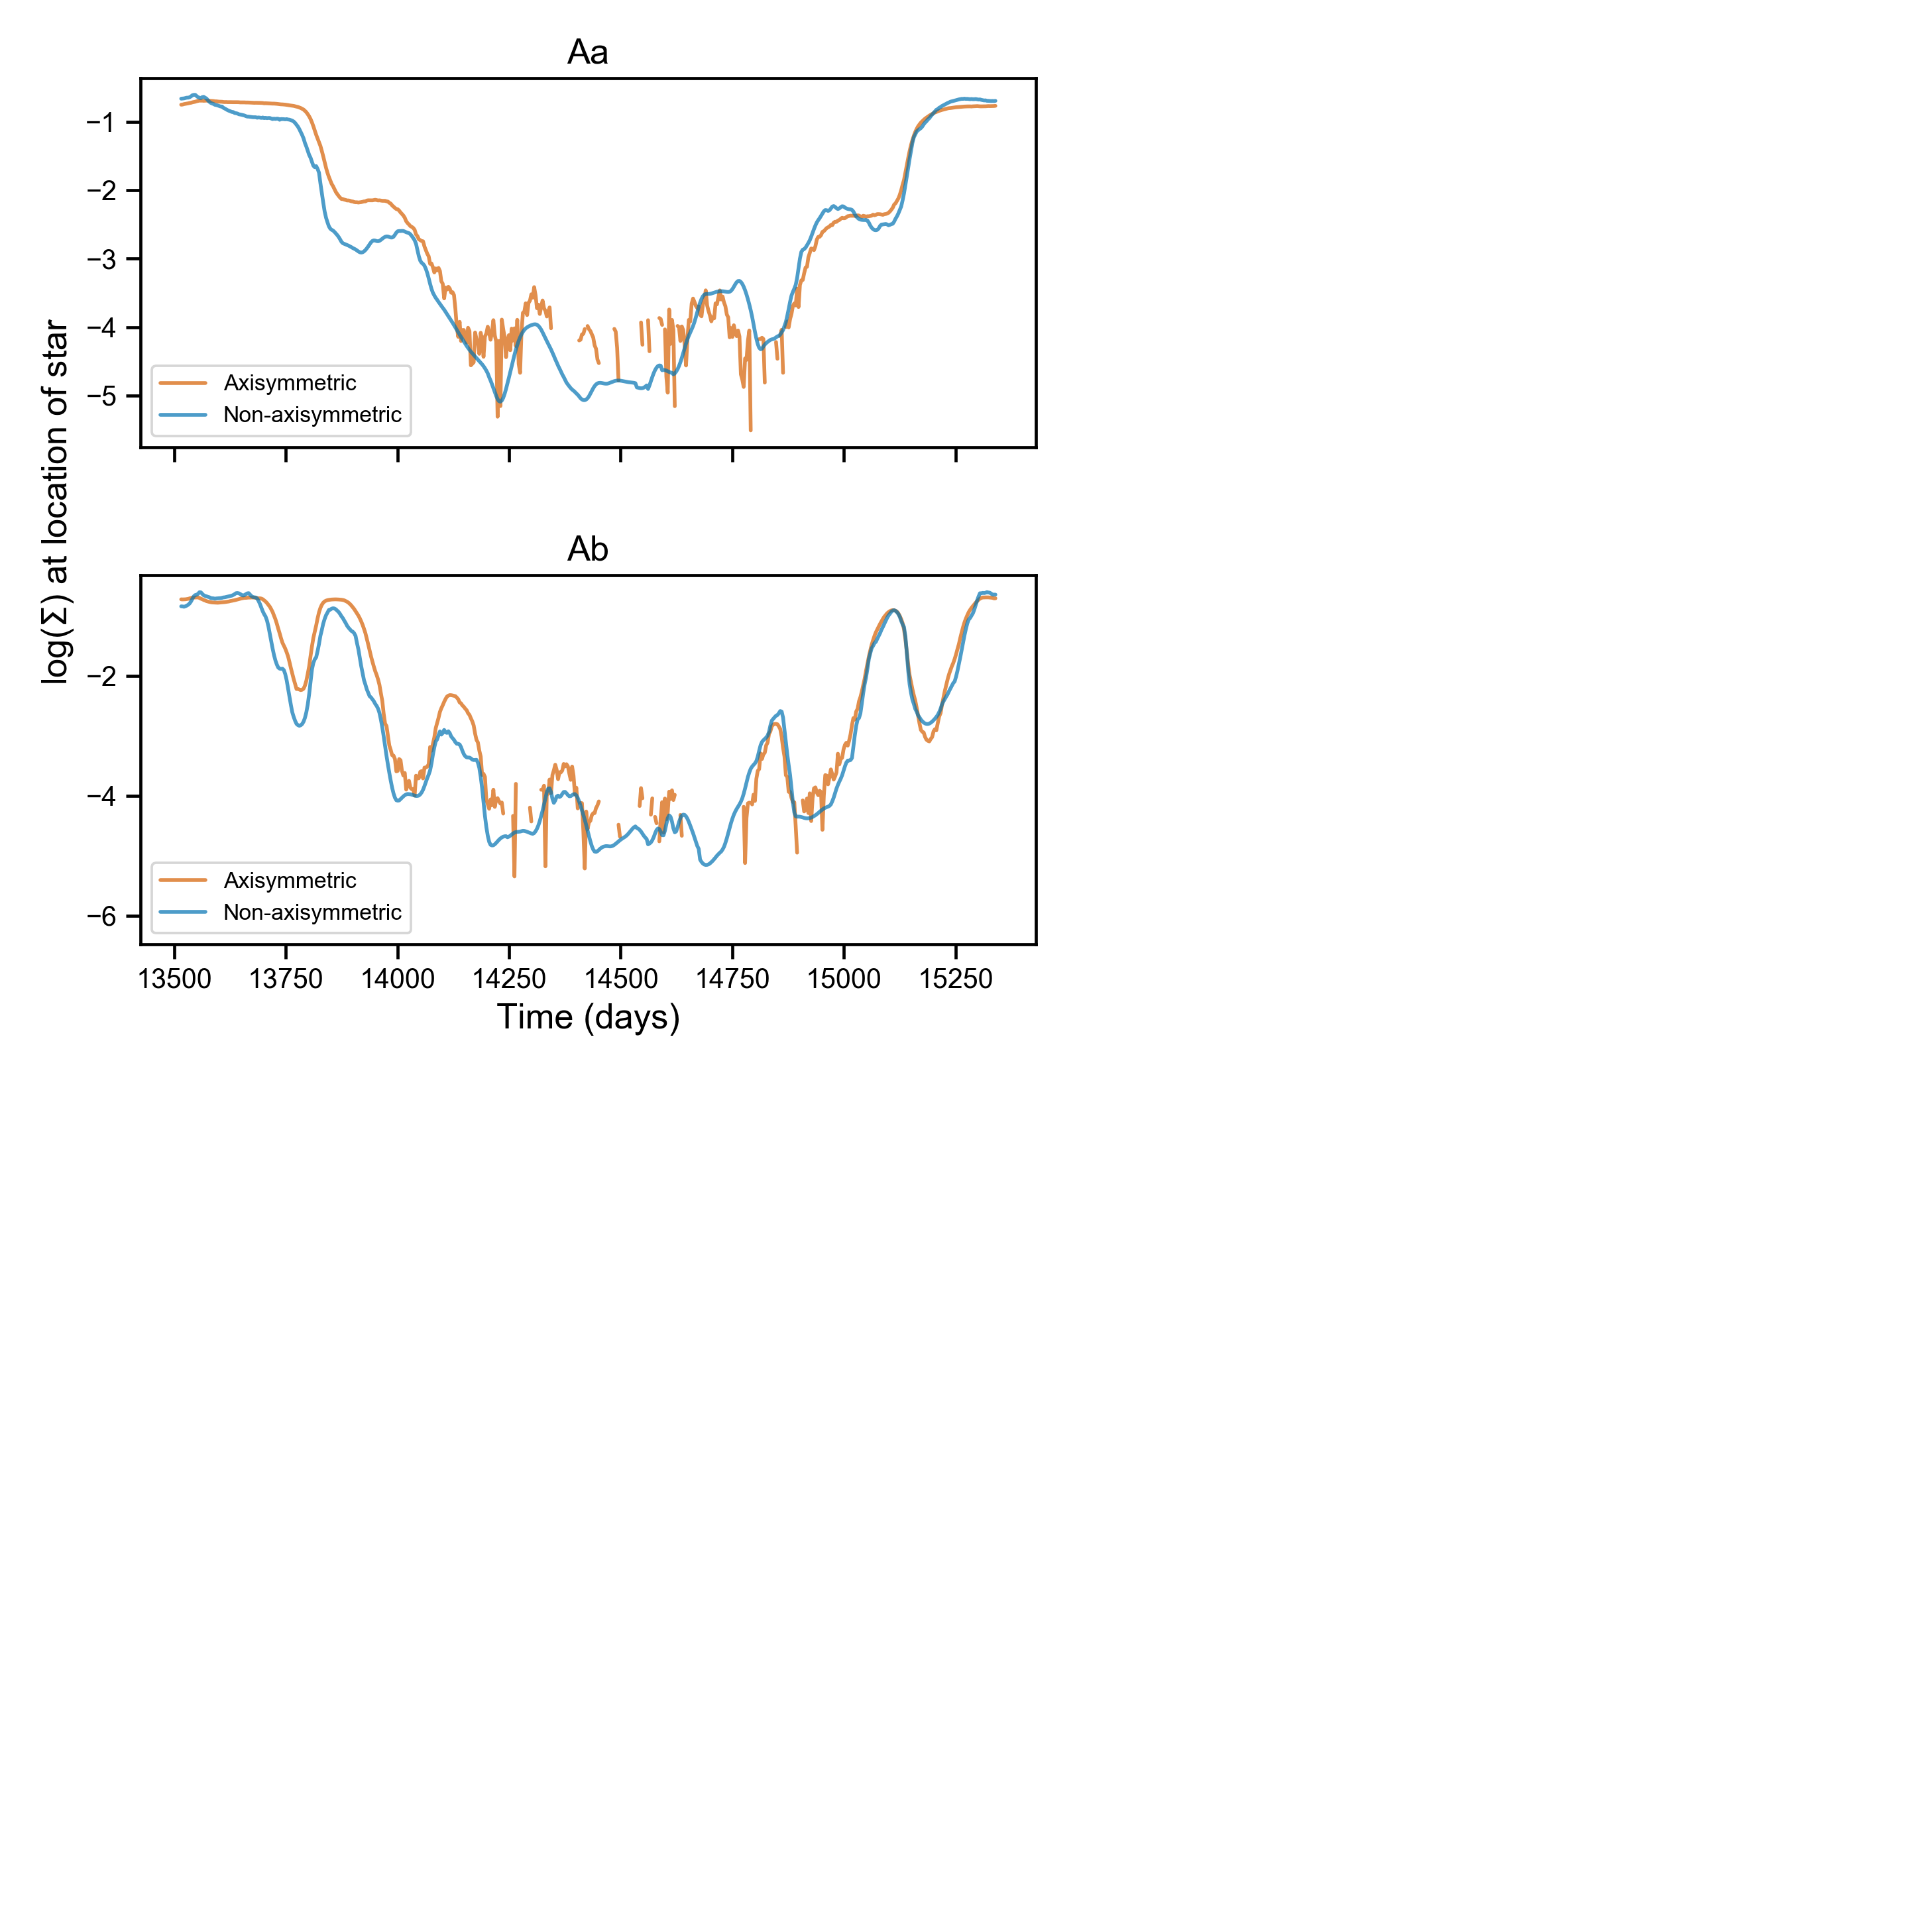

First dumpfile:  512
Last dumpfile:  1092


/storage/astro2/phrkvg/env/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/storage/astro2/phrkvg/env/lib64/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


In [16]:
# Plot log density as stars pass behind disc cavity

fig_transit, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)
start = 37
end =  42

# Convert units to g/cm2
sigma_Aa_gcm2 = sigma_Aa*(1.989e33)/(1.496e13)**2
sigma_Ab_gcm2 = sigma_Ab*(1.989e33)/(1.496e13)**2

ti = int((start-36.2)/(0.01*0.862))
tf = int((end-36.2)/(0.01*0.862))
print('First dumpfile: ', ti+420)
print('Last dumpfile: ', tf+420)
t = np.array(times)*365.25


ax[0].set_title('Aa')
ax[0].plot(t[ti:tf], np.log10(sigma_Aa_gcm2)[ti:tf], 'r', label='Axisymmetric', alpha=0.7, figure=fig_transit)
ax[0].plot(t[ti:tf], np.log10(density_Aa)[ti:tf], 'b', label='Non-axisymmetric', alpha=0.7, figure=fig_transit)
leg0 = ax[0].legend(prop={'size': 9})
# frame = leg0.get_frame()
# frame.set_facecolor('black')

ax[1].set_title('Ab')
ax[1].plot(t[ti:tf], np.log10(sigma_Ab_gcm2)[ti:tf], 'r', label='Axisymmetric', alpha=0.7, figure=fig_transit)
ax[1].plot(t[ti:tf], np.log10(density_Ab)[ti:tf], 'b', label='Non-axisymmetric', alpha=0.7, figure=fig_transit)
ax[1].set_xlabel('Time (days)')
leg1 = ax[1].legend(prop={'size': 9})
ax[1].set_ylabel('log($\Sigma$) at location of star', position=(-0.05, 1.2))

# frame = leg1.get_frame()
# frame.set_facecolor('black')

plt.tight_layout()


<IPython.core.display.Javascript object>


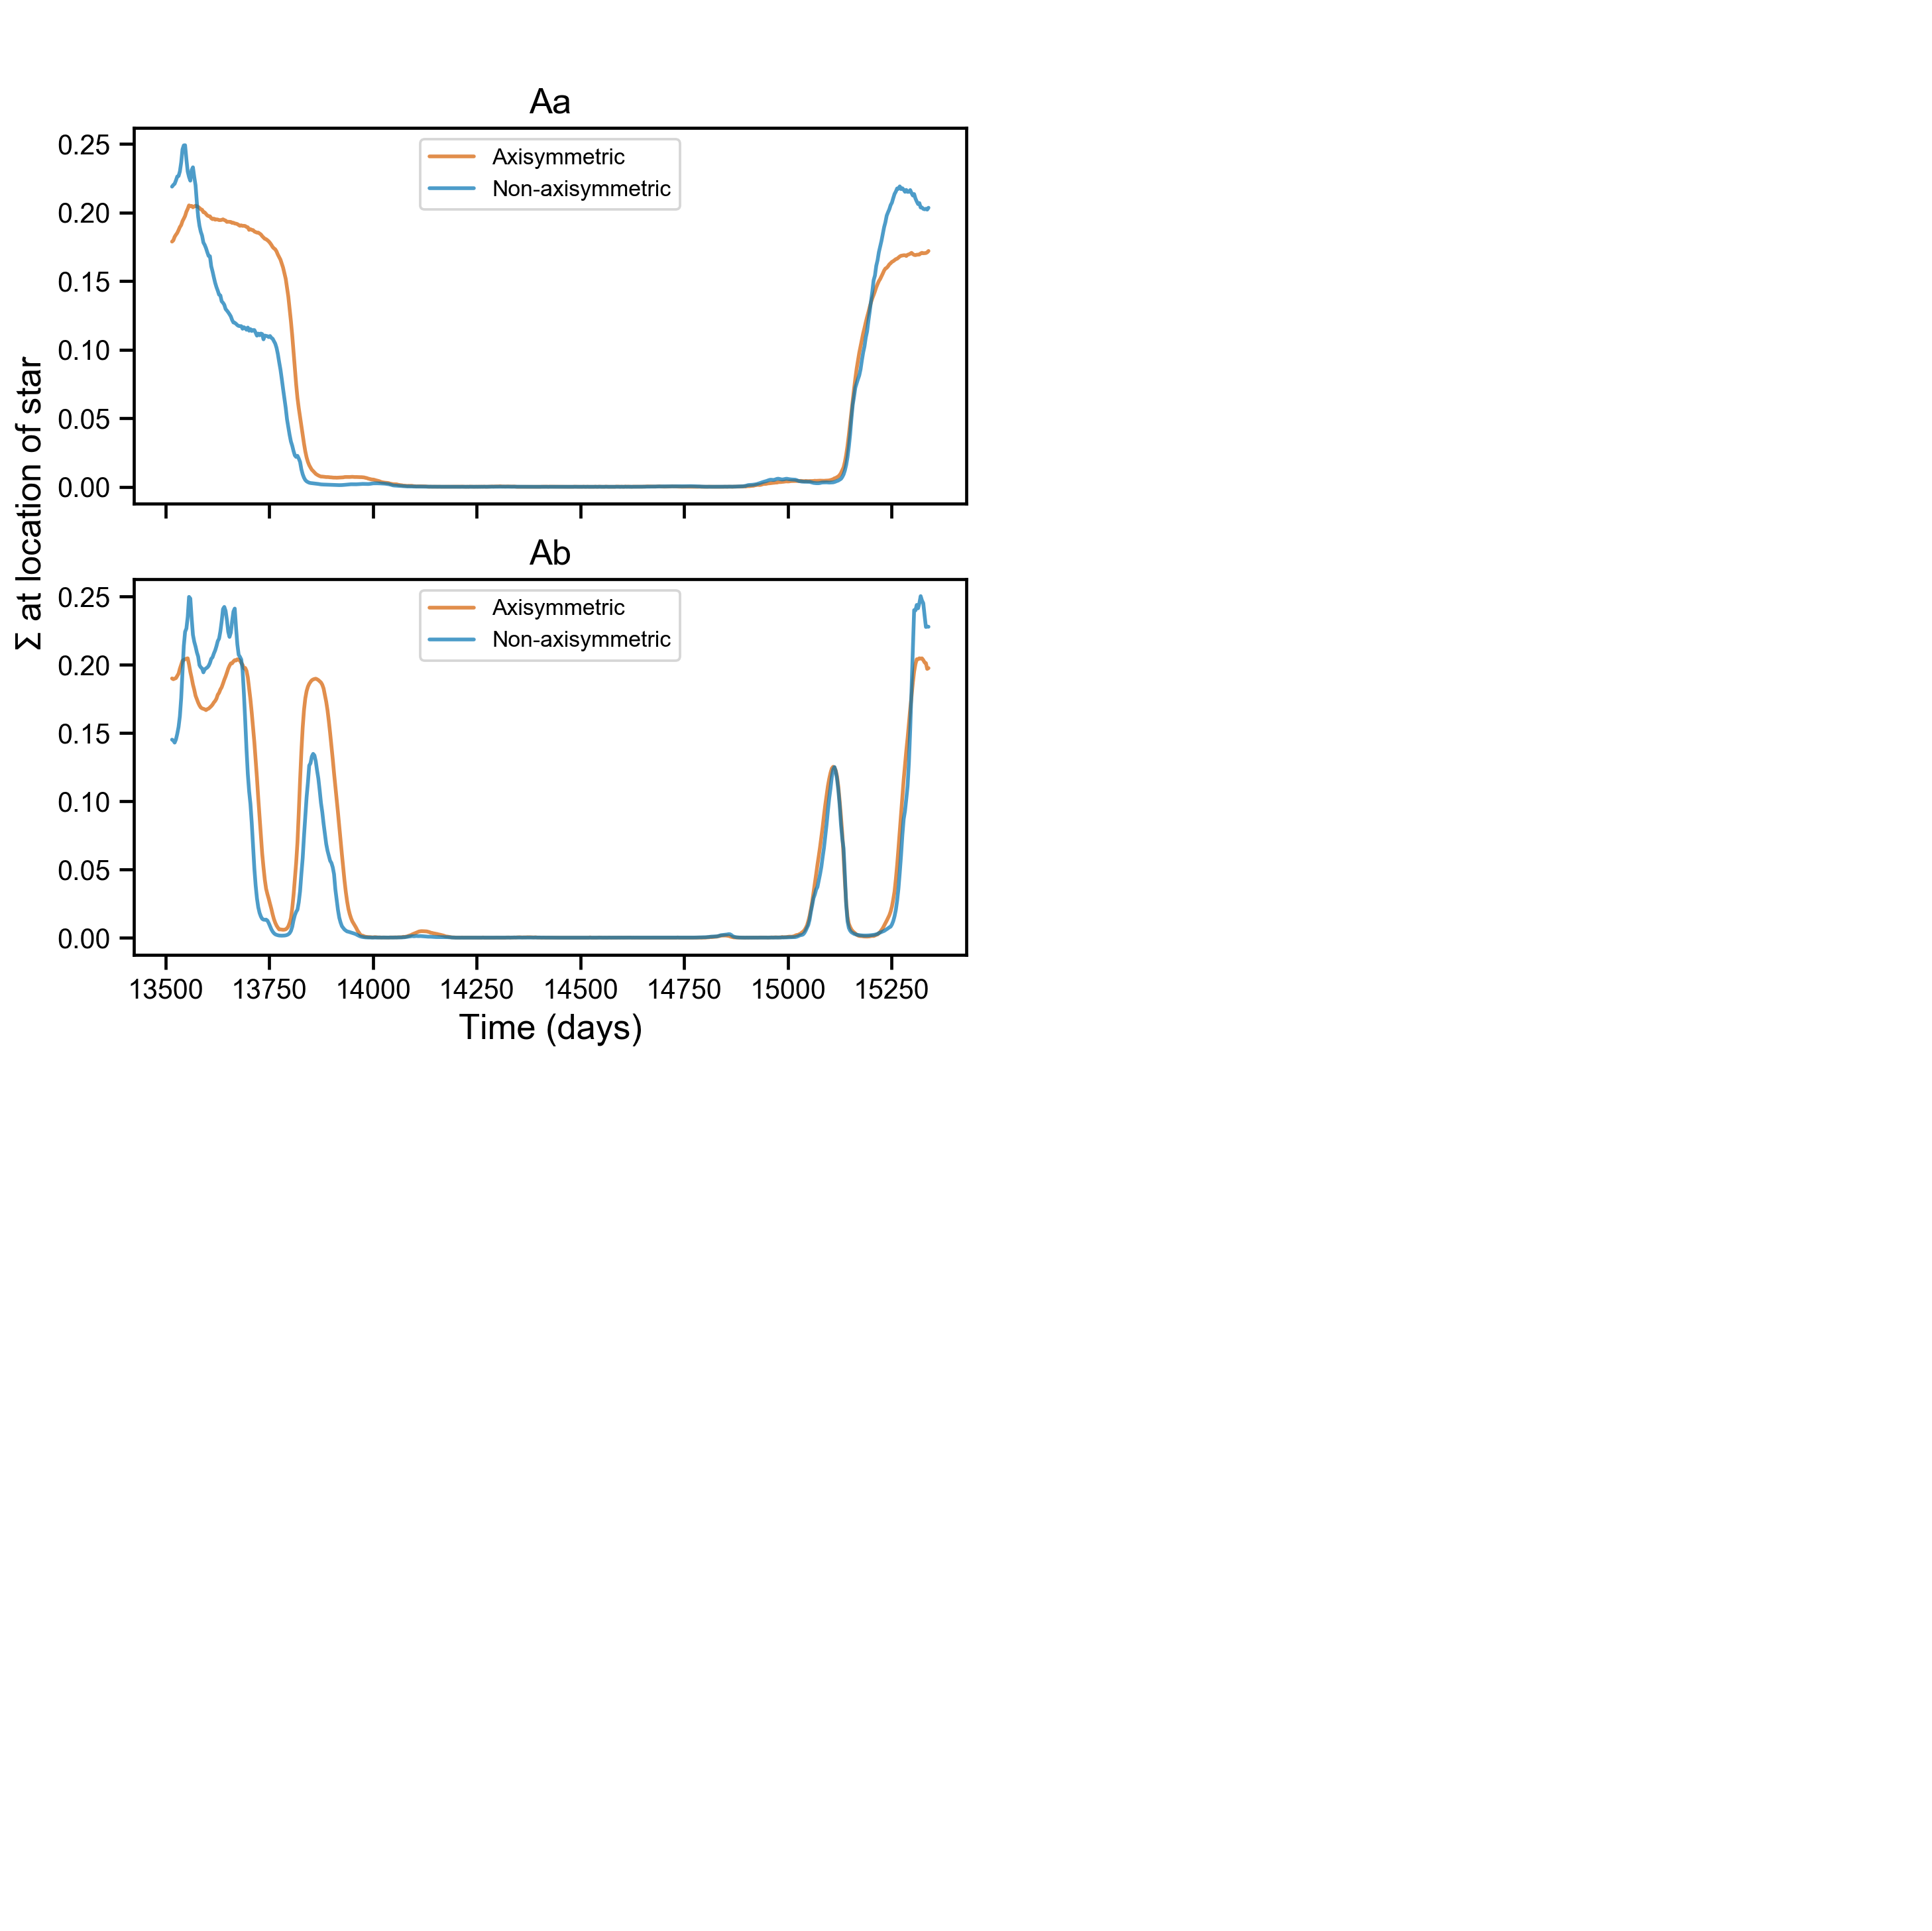

First dumpfile:  512
Last dumpfile:  1092


NameError: name 'density' is not defined

In [17]:
# Plot density as stars pass behind disc cavity

fig_transit, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)
start = 37
end =  42

# Convert units to g/cm2
sigma_Aa_gcm2 = sigma_Aa*(1.989e33)/(1.496e13)**2
sigma_Ab_gcm2 = sigma_Ab*(1.989e33)/(1.496e13)**2

ti = int((start-36.2)/(0.01*0.862))
tf = int((end-36.2)/(0.01*0.862))
print('First dumpfile: ', ti+420)
print('Last dumpfile: ', tf+420)
t = np.array(times)*365.25


ax[0].set_title('Aa')
ax[0].plot(t[ti:tf], sigma_Aa_gcm2[ti:tf], 'r', label='Axisymmetric', alpha=0.7, figure=fig_transit)
ax[0].plot(t[ti:tf], density_Aa[ti:tf], 'b', label='Non-axisymmetric', alpha=0.7, figure=fig_transit)
# ax[0].set_ylim(-6,0)
leg0 = ax[0].legend(prop={'size': 9})
# frame = leg0.get_frame()
# frame.set_facecolor('black')

ax[1].set_title('Ab')
ax[1].plot(t[ti:tf], sigma_Ab_gcm2[ti:tf], 'r', label='Axisymmetric', alpha=0.7, figure=fig_transit)
ax[1].plot(t[ti:tf], density_Ab[ti:tf], 'b', label='Non-axisymmetric', alpha=0.7, figure=fig_transit)
ax[1].set_xlabel('Time (days)')
# ax[1].set_ylim(-6,1)
leg1 = ax[1].legend(prop={'size': 9})
ax[1].set_ylabel('$\Sigma$ at location of star', position=(-0.05, 1.2))

print(density(Aa))
# frame = leg1.get_frame()
# frame.set_facecolor('black')

plt.tight_layout()


<IPython.core.display.Javascript object>


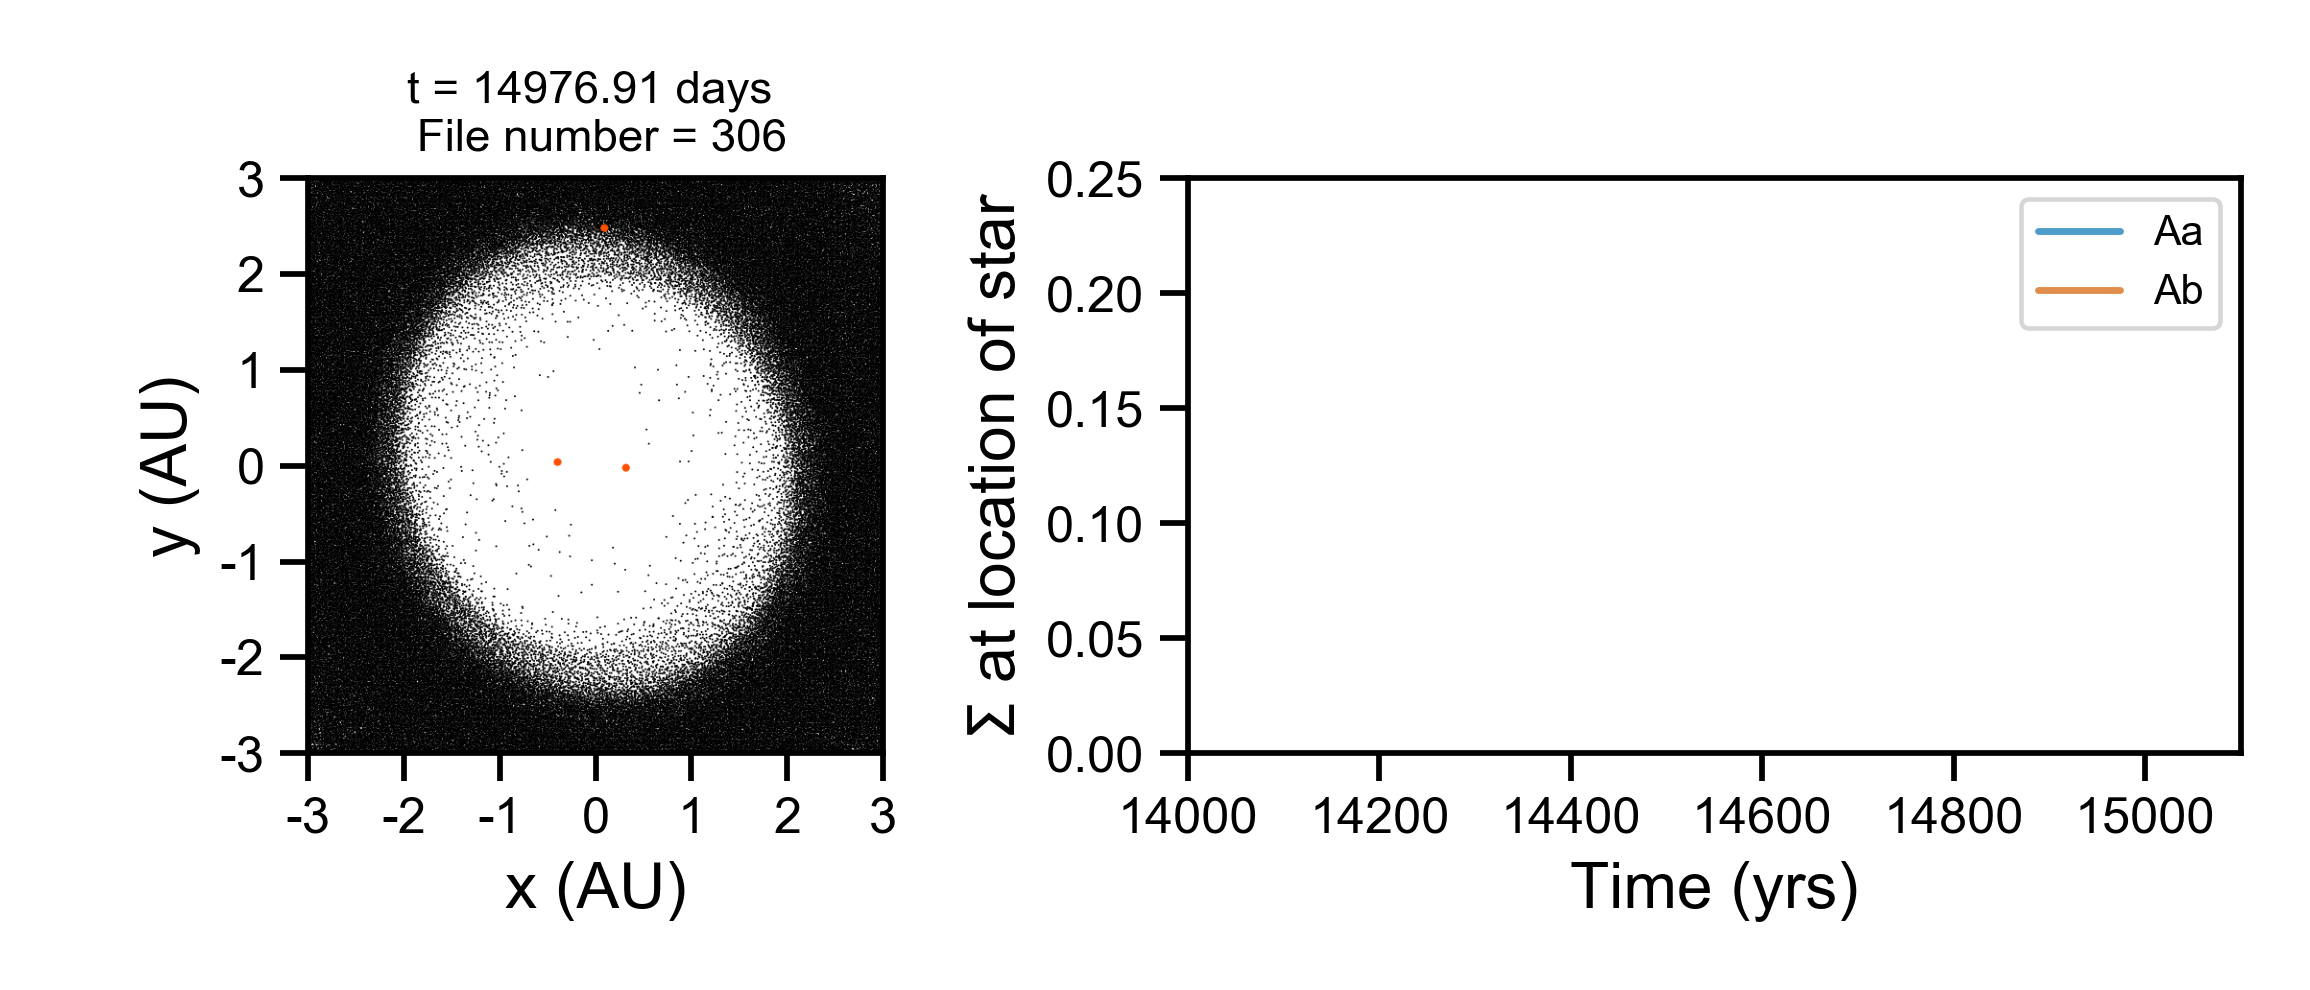

First dumpfile:  670
Last dumpfile:  1000


KeyboardInterrupt: 

In [20]:
# fig_transit, ax = plt.subplots(1, 2, figsize=(7,3), gridspec_kw={'width_ratios': [1, 1]})


# # Convert units to g/cm2
# sigma_Aa_gcm2 = sigma_Aa*(1.989e33)/(1.496e13)**2
# sigma_Ab_gcm2 = sigma_Ab*(1.989e33)/(1.496e13)**2

# t_days = np.array(times)*365.25
# start_dump = 670
# end_dump = 1000

# ti = start_dump - 420
# tf = end_dump - 420
# print('First dumpfile: ', start_dump)
# print('Last dumpfile: ', end_dump)


# for i in np.arange(331):
#     ax[0].cla()
#     splash_img = mpimg.imread(f'./hd98800_highdt/splash_{str(i).rjust(4,"0")}.png')
#     ax[0].imshow(splash_img)
#     ax[0].set_title(f't = {str(round(t_days[250+i], 2))} days \n File number = {str(i)}', fontsize=10)
#     ax[0].set_xlim(100,700)
#     ax[0].set_ylim(600,0)
#     ax[0].set_xticks(np.arange(100,701,100))
#     ax[0].set_yticks(np.arange(600,-1,-100))
#     ax[0].set_xticks(np.union1d(ax[0].get_xticks(), [100]))
#     ax[0].set_xticklabels([-3,-2,-1,0,1,2,3])
#     ax[0].set_yticks(np.union1d(ax[0].get_yticks(), [600]))
#     ax[0].set_yticklabels([3,2,1,0,-1,-2,-3])
#     ax[0].set_xlabel('x (AU)')
#     ax[0].set_ylabel('y (AU)')

# #     ax[1].plot(t_days[:i+671], np.log10(density_Aa[:i+1]), 'b', label='Aa', alpha=0.7, figure=fig_transit)
# #     ax[1].plot(t_days[:i+671], np.log10(density_Ab[:i+1]), 'r', label='Ab', alpha=0.7, figure=fig_transit)
#     ax[1].plot(t_days[250:251+i], (density_Aa[250:251+i]), 'b', label='Aa', alpha=0.7, figure=fig_transit)
#     ax[1].plot(t_days[250:251+i], (density_Ab[250:251+i]), 'r', label='Ab', alpha=0.7, figure=fig_transit)
#     ax[1].set_xlim(14000, 15100)
#     ax[1].set_ylim(0,0.25)
#     ax[1].set_ylabel('$\Sigma$ at location of star')
#     ax[1].set_xlabel('Time (yrs)')

    
#     handles, labels = plt.gca().get_legend_handles_labels()
#     by_label = dict(zip(labels, handles))
#     leg = ax[1].legend(by_label.values(), by_label.keys(), prop={'size': 9})

# #     leg.get_frame().set_facecolor('black')
# #     plt.show()
#     plt.tight_layout()
#     plt.savefig(f'img2_{str(i).rjust(4,"0")}.png')


In [ ]:
angm_files = np.arange(450,551)
sims = ['hd98800', 'hd98800_3m', 'hd98800_30m']
radii = [2,3,4]

fig,ax = plt.subplots(nrows=len(radii))

for file in files:
    for sim in sims:
        angm_data = pd.read_csv(file, sep='\s+', skiprows=[0,1], engine='python', names=[columns[i] for i in range(11)]) 
    radii = np.array(angm_data['radius'])
    sigma = angm_data['sigma'].tolist()
    
    x_Aa = data3.loc[data3['0'] == code_time]['1']
    y_Aa = data3.loc[data3['0'] == code_time]['2']
    x_Ab = data1.loc[data1['0'] == code_time]['1']
    y_Ab = data1.loc[data1['0'] == code_time]['2']
    r_Aa = float((x_Aa**2 + y_Aa**2)**0.5)
    r_Ab = float((x_Ab**2 + y_Ab**2)**0.5)

#     i_Aa = np.nanargmin(abs(radii - r_Aa))
#     closest_r_Aa = radii[i_Aa]
#     i_Ab = np.nanargmin(abs(radii - r_Ab))
#     closest_r_Ab = radii[i_Ab]

    interp = interp1d(radii, sigma)
    if min(radii) < r_Aa < max(radii):
        sigma_at_Aa = interp(r_Aa)

    
